<div style="color:black;
           display:fill;
           border-radius:0.5px;
           background-color:lightblue;
           font-size:20px;
           font-weight:600;
           font-family:Garamond;
           letter-spacing:0.05px">

<p style="padding:px;
              color:black;">

              

<h1>BUSINESS UNDERSTANDING </h1>
    
The loan providing companies find it hard to give loans to the people due to their insufficient or
non-existent credit history. Some consumers use this to their advantage by defaulting on loans. Suppose you work for a consumer finance company which specializes in lending various types of loans to urban customers. You have to use EDA to analyze the patterns present in the data. This will ensure that the applicants capable of repaying the loan are not rejected.
When the company receives a loan application, the company has to decide for loan approval based on the applicant’s profile.<br> 
Two types of risks are associated with the bank’s decision:<br>
1. If the applicant is likely to repay the loan, then not approving the loan results in a
loss of business to the company<br>
2. If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then
approving the loan may lead to a financial loss for the company.<br>

To avoid risks associated with lending loan, we can do a detailed Exploratory Data Analysis on the given data sets. This can give us information on defaulters pattern and draw insights from it.<br>
    
</p>
</div>


In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import itertools
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype

<div style="color:black;
           display:fill;
           border-radius:0.5px;
           background-color:lightblue;
           font-size:20px;
           font-weight:600;
           font-family:Garamond;
           letter-spacing:0.05px">

<p style="padding:px;
              color:black;">
    
<h1> Loading Datasets for Analysis</h1><br>
There are 3 datasets given:<br>
1. columns_description.csv:- Gives information on the columns in both datasets<br>
2. application_data.csv:- This dataset gives information on loan, difficulty in repayment of loans<br> 
3. previous_data.csv:- This dataset gives information on previous loan applications<br>
    
</p>
</div>

In [2]:
df_columns = pd.read_csv('columns_description.csv')
df_application = pd.read_csv('application_data.csv')
df_prev_app = pd.read_csv('previous_application.csv')

# Getting Information on the data

In [3]:
# Displays all the rows
pd.set_option("display.max_rows", None)
df_columns

,Unnamed: 0,Table,Row,Description,Special
0,1,application_data,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_data,TARGET,Target variable (1 - client with payment diffi...,NaN
2,5,application_data,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,6,application_data,CODE_GENDER,Gender of the client,NaN
4,7,application_data,FLAG_OWN_CAR,Flag if the client owns a car,NaN
5,8,application_data,FLAG_OWN_REALTY,Flag if client owns a house or flat,NaN
6,9,application_data,CNT_CHILDREN,Number of children the client has,NaN
7,10,application_data,AMT_INCOME_TOTAL,Income of the client,NaN
8,11,application_data,AMT_CREDIT,Credit amount of the loan,NaN
9,12,application_data,AMT_ANNUITY,Loan annuity,NaN


In [4]:
# Gives general information on application dataset no of columns no of rows 
df_application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [5]:
# Gives general information on previous application dataset no of columns no of rows 
df_prev_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

<div style="color:black;
           display:fill;
           border-radius:0.5px;
           background-color:lightblue;
           font-size:20px;
           font-weight:600;
           font-family:Garamond;
           letter-spacing:0.05px">

<p style="padding:px;
              color:black;">
    
<h1> Data Cleaning</h1>
    <ul>
<li> Data cleaning involves either finding and removing columns or rows with null values or replacing the null value with any suitable value. This is done to make a reliable analysis.</li>
<li>Their deletion depends on whether a given column adds value to our analysis or not.</li>
<li> But at any given point removing columns with more than 30% data seems logical though there is no said rule for it.</li>
    </ul>
</p>
</div>


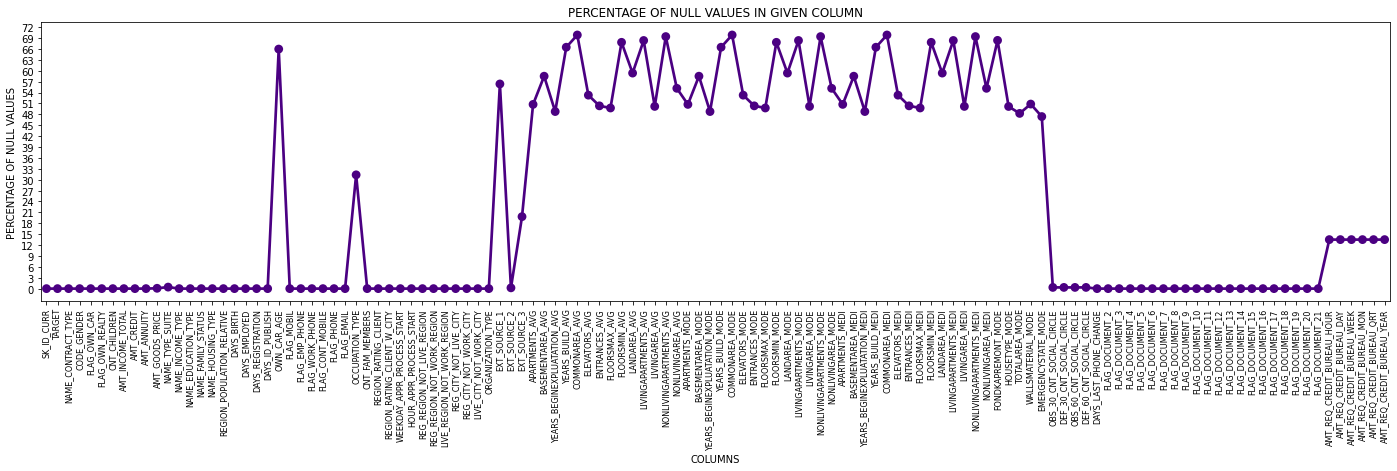

In [6]:
# GRAPHICAL REPRESENTATION OF NULL VALUES IN A COLUMN IN ANY GIVEN DATASET
# NULL VALUES IN APPLICATION DATASET
df_app_null = pd.DataFrame(100*df_application.isnull().sum()/len(df_application)).reset_index(0)
df_app_null.columns = ['COLUMNS', 'PERCENTAGE OF NULL VALUES']
fig,ax = plt.subplots()
fig.set_size_inches(20,5)
fig.tight_layout(pad=3)

plt.yticks(np.arange(0, max(df_app_null['PERCENTAGE OF NULL VALUES']+20), 3))
plt.xticks(rotation=90,fontsize=8)
plt.title('PERCENTAGE OF NULL VALUES IN GIVEN COLUMN')
apn = sns.pointplot( x="COLUMNS",y="PERCENTAGE OF NULL VALUES",data=df_app_null,color='indigo')

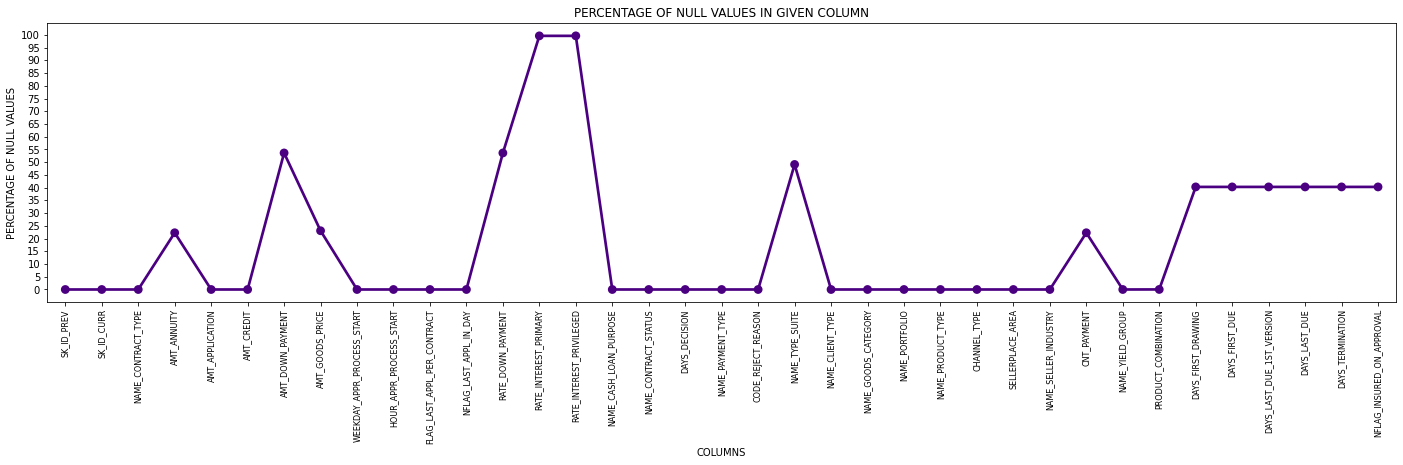

In [7]:
# GRAPHICAL REPRESENTATION OF NULL VALUES IN A COLUMN IN ANY GIVEN DATASET
# NULL VALUES IN PREVIOUS APPLICATION DATASET
df_prev_null = pd.DataFrame(100*df_prev_app.isnull().sum()/len(df_prev_app)).reset_index(0)
df_prev_null.columns = ['COLUMNS', 'PERCENTAGE OF NULL VALUES']
fig,ax = plt.subplots()
fig.set_size_inches(20,5)
fig.tight_layout(pad=3)
plt.yticks(np.arange(0, max(df_prev_null['PERCENTAGE OF NULL VALUES']+20), 5))
plt.xticks(rotation=90,fontsize=8)
plt.title('PERCENTAGE OF NULL VALUES IN GIVEN COLUMN')
apn = sns.pointplot( x="COLUMNS",y="PERCENTAGE OF NULL VALUES",data=df_prev_null,color='indigo')

# Finding and dropping columns having more than 40% or 30% null values.

In [8]:
# FINDING NULL VALUES IN APPLICATION DATASET WITH MORE THAN 40%.
df_null = df_application.isnull().sum()/len(df_application)*100
df_null = df_null[df_null.values>40.0]
df_nu = pd.DataFrame(df_null)

drop_c = []
for col in df_nu.T:
    for c in df_application:
         if col == c:
            drop_c.append(c)
            
# Dropping EXT_SOURCE since it is normalised and dont know the idea           
drop_c.append('EXT_SOURCE_2')    
drop_c.append('EXT_SOURCE_3')
#NO OF COLUMNS THAT WOULD BE DELETED
print(len(drop_c))    


51


In [9]:
# DROPING COLUMNS 
df_application.drop(columns=drop_c,inplace=True)

In [10]:
#CHECKING FINAL VERSION OF DATA
df_application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 71 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [11]:
# FINDING NULL VALUES IN PREVIOUS DATASET WITH MORE THAN 30%.
prev_null = df_prev_app.isnull().sum()/len(df_prev_app)*100
prev_null = prev_null[prev_null.values>30.0]
prev_nu = pd.DataFrame(prev_null)

drop_pc = []
for col in prev_nu.T:
    for c in df_prev_app:
         if col == c:
            drop_pc.append(c)
            
print(len(drop_pc)) 
df_prev_app.drop(columns=drop_pc,inplace=True)

11


In [12]:
#CHECKING FINAL VERSION OF DATA
df_prev_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 26 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_GOODS_PRICE              1284699 non-null  float64
 7   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 8   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 9   FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 10  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 11  NAME_CASH_LOAN_PURPOSE       1670214 non-null  object 
 12  NAME_CONTRACT_STATUS         1670214 non-n

<div style="color:black;
           display:fill;
           border-radius:0.5px;
           background-color:lightblue;
           font-size:20px;
           font-weight:600;
           font-family:Garamond;
           letter-spacing:0.05px">

<p style="padding:px;
              color:black;">
    
<h1> DATA PREPROCESSING</h1>
<ul>
<li> There are columns showing no of days instead of years, also columns showing amount the data is continuous.</li>
<li>For ease in analysis and visualization we are going to convert these columns in years and create bins for such columns.</li>
<li>We will also merge both the data to create new data so as to find insights if any.</li>
<li>Also separate dataframes for defaulters and non-defaulters will be made for analysis.</li>    
</ul>    
</p>
</div>    

In [13]:
# '''Convert days to years'''
df_application['DAYS_ID_PUBLISH']= df_application['DAYS_ID_PUBLISH']//-365
df_application['DAYS_EMPLOYED']= df_application['DAYS_EMPLOYED']//-365
df_application['DAYS_LAST_PHONE_CHANGE']= df_application['DAYS_LAST_PHONE_CHANGE']//-365
df_application['DAYS_BIRTH']= df_application['DAYS_BIRTH']//-365

In [14]:
# CREATING BINS AND SOME COLUMNS WITH NUMERICAL DATA IS DIVIDED BASED ON BINS
bins = [25000,   50000,   75000,  100000,  125000,  150000,
        175000,  200000,  225000,  250000,  275000,  300000,  325000, 
        350000,  375000,  400000,  425000,  450000,  475000,  500000, 10000000000]
bins
df_application['AMT_INCOME'] = pd.cut(df_application['AMT_INCOME_TOTAL'], bins)
df_application['AMT_CRED'] = pd.cut(df_application['AMT_CREDIT'], bins)
df_application['AMT_GOODS'] = pd.cut(df_application['AMT_GOODS_PRICE'], bins)
df_application['AMT_ANN'] = pd.cut(df_application['AMT_ANNUITY'], bins)

In [15]:
# HERE I HAVE CONVERTED TARGET INTO STRING TYPE AS EASY APPROACH FOR VISUALIZING
df_application['TARGET'] = df_application.TARGET.astype(str)
df_application['AMT_INCOME'] = df_application.AMT_INCOME.astype(str)
df_application['AMT_CRED'] = df_application.AMT_CRED.astype(str)
df_application['AMT_GOODS'] = df_application.AMT_GOODS.astype(str)
df_application['AMT_ANN'] = df_application.AMT_ANN.astype(str)

In [16]:
# CREATING BINS FOR AGE
age_bin = [15,20,25,30,35,40,45,50,55,60,65,70,75,80,85]     
age_bin
df_application['AGE_YEARS'] = pd.cut(df_application['DAYS_BIRTH'], age_bin)
df_application['AGE_YEARS'] = df_application['AGE_YEARS'].astype(str)

In [17]:
# CREATING NEW DATAFRAME BY MERGING APPLICATION AND PREVIOUS DATA TO FIND INSIGHTS IF ANY
df_merge = pd.merge(df_prev_app, df_application, how='inner', on = 'SK_ID_CURR')

In [18]:
# MAKING SEPARATE DATAFRAME FOR DEFAULTER
df_default = df_application[df_application['TARGET']== '1']
df_default.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24825 entries, 0 to 307509
Data columns (total 76 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SK_ID_CURR                   24825 non-null  int64  
 1   TARGET                       24825 non-null  object 
 2   NAME_CONTRACT_TYPE           24825 non-null  object 
 3   CODE_GENDER                  24825 non-null  object 
 4   FLAG_OWN_CAR                 24825 non-null  object 
 5   FLAG_OWN_REALTY              24825 non-null  object 
 6   CNT_CHILDREN                 24825 non-null  int64  
 7   AMT_INCOME_TOTAL             24825 non-null  float64
 8   AMT_CREDIT                   24825 non-null  float64
 9   AMT_ANNUITY                  24825 non-null  float64
 10  AMT_GOODS_PRICE              24804 non-null  float64
 11  NAME_TYPE_SUITE              24755 non-null  object 
 12  NAME_INCOME_TYPE             24825 non-null  object 
 13  NAME_EDUCATION_

In [19]:
# MAKING SEPARATE DATAFRAME FOR NONDEFAULTER
df_nondefault = df_application[df_application['TARGET']== '0']
df_nondefault.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 282686 entries, 1 to 307510
Data columns (total 76 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   282686 non-null  int64  
 1   TARGET                       282686 non-null  object 
 2   NAME_CONTRACT_TYPE           282686 non-null  object 
 3   CODE_GENDER                  282686 non-null  object 
 4   FLAG_OWN_CAR                 282686 non-null  object 
 5   FLAG_OWN_REALTY              282686 non-null  object 
 6   CNT_CHILDREN                 282686 non-null  int64  
 7   AMT_INCOME_TOTAL             282686 non-null  float64
 8   AMT_CREDIT                   282686 non-null  float64
 9   AMT_ANNUITY                  282674 non-null  float64
 10  AMT_GOODS_PRICE              282429 non-null  float64
 11  NAME_TYPE_SUITE              281464 non-null  object 
 12  NAME_INCOME_TYPE             282686 non-null  object 
 13 

<div style="color:black;
           display:fill;
           border-radius:0.5px;
           background-color:lightblue;
           font-size:20px;
           font-weight:600;
           font-family:Garamond;
           letter-spacing:0.05px">

<p style="padding:px;
              color:black;">
    
<h1> Univariate Analysis</h1>
<ul>    
<li>Univariate is a simple analysis showing pattern of data in each columns in terms of histogram or bar graph.</li><br>
<li>Here ill be running a loop to get an overview of all the columns.</li><br>
<li>Later the analysis will be elaborate.</li><br>
<li>In the application data 'Target' variable tells us whether the given ID has defaulted or not. So considering it as most important feature we will draw our conclusions based on it.</li><br>    
</ul>    
</p>
</div>    

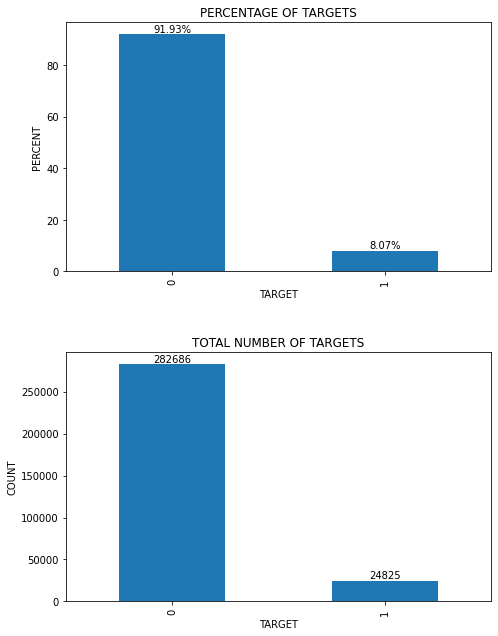

In [20]:
# PLOTTING DISTRIBUTION OF TARGET VARIABLE
fig,ax= plt.subplots(2,1)
fig.set_size_inches(8, 10)
fig.tight_layout(pad=6)

target_df = df_application['TARGET'].value_counts(normalize=True).rename().mul(100).reset_index()
bar_t = target_df.plot(ax=ax[0],kind='bar',colormap='tab10',title='PERCENTAGE OF TARGETS')
bar_t.set_ylabel('PERCENT')
bar_t.set_xlabel('TARGET')
bar_t.get_legend().remove()
for p in bar_t.patches:
    bar_t.annotate(f'{p.get_height():.2f}%',
                   (p.get_x() + p.get_width() / 2,
                    p.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 5),
                   textcoords='offset points')

bar_t2 =  df_application['TARGET'].value_counts().plot(ax=ax[1], kind='bar',colormap='tab10',title='PERCENTAGE OF TARGETS')    
bar_t2.set_title('TOTAL NUMBER OF TARGETS')
bar_t2.set_ylabel('COUNT')
bar_t2.set_xlabel('TARGET')
for p in bar_t2.patches:
    bar_t2.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2,
                    p.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 5),
                   textcoords='offset points')

<div style="color:black;
           display:fill;
           border-radius:0.5px;
           background-color:papayawhip;
           font-size:20px;
           font-weight:600;
           font-family:Garamond;
           letter-spacing:0.05px">

<p style="padding:px;
              color:black;">

<h4> INSIGHTS: </h4>

<ul>
<li>Most of the clients i.e. 91.93% are non defaulters while only 8% of them have defaulted in repayment.</li><br>

<li>This seems a highly imbalanced data.</li><br>

<li>We will have to investigate further, study other features in relation to find out the pattern of defaulters.</li><br>

</ul>  
    
</p>
</div>    

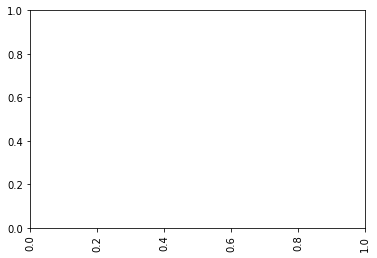

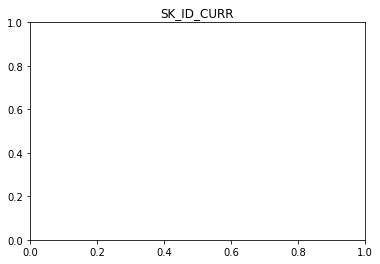

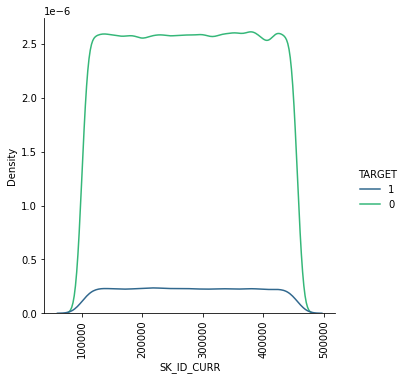

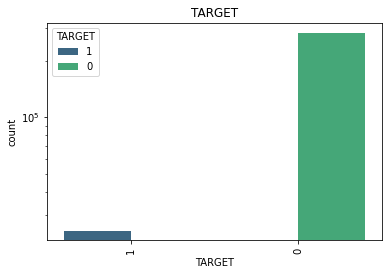

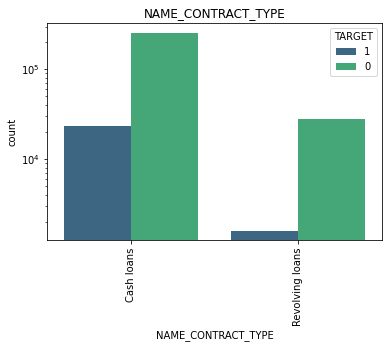

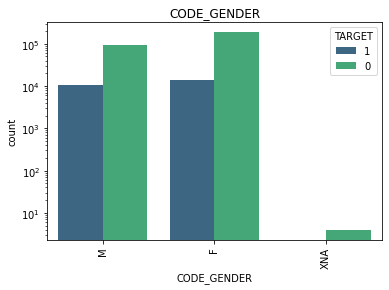

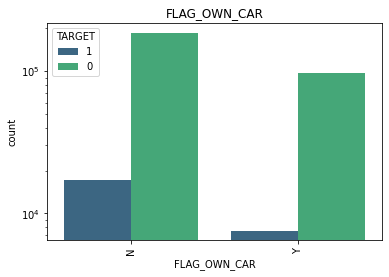

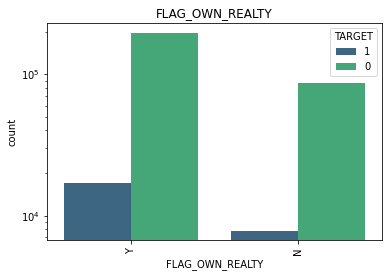

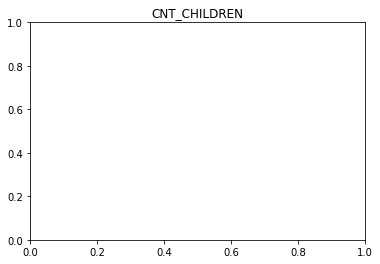

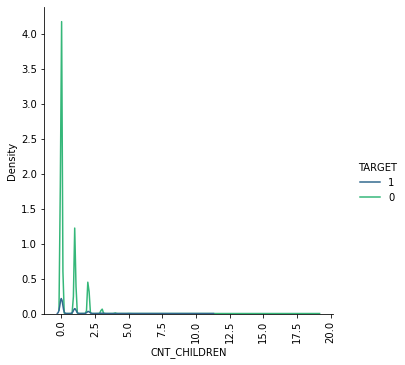

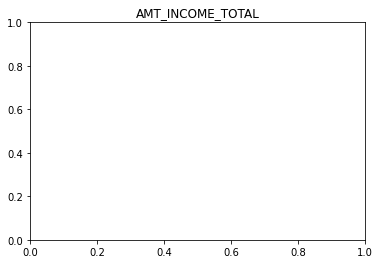

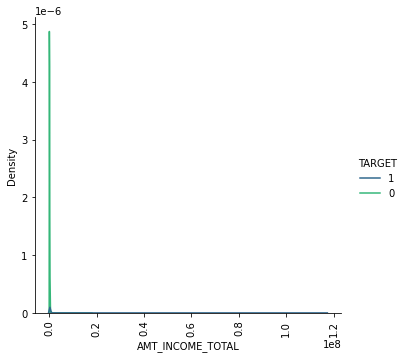

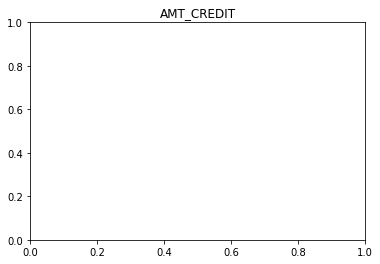

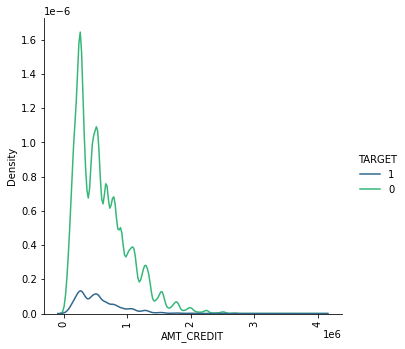

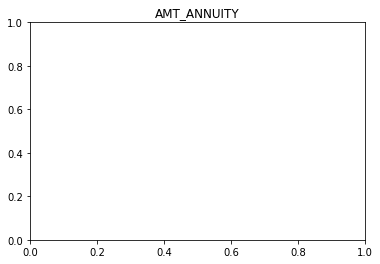

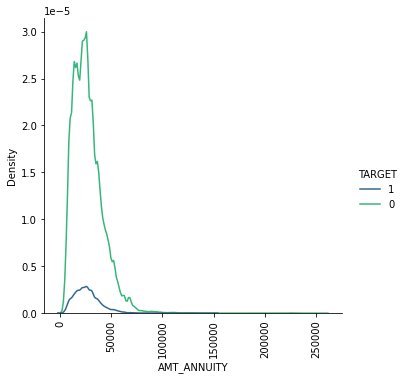

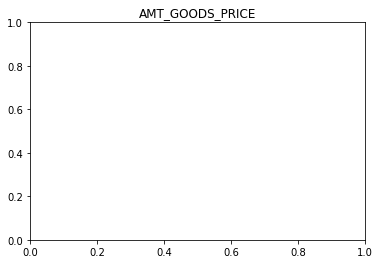

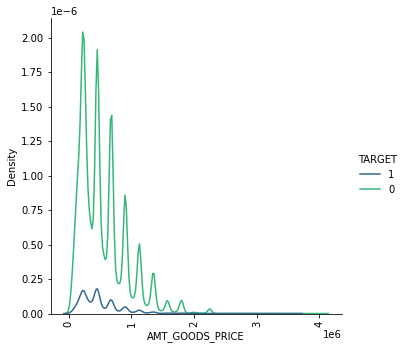

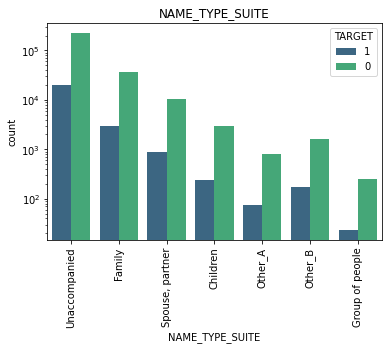

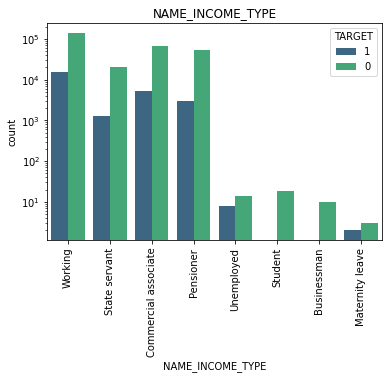

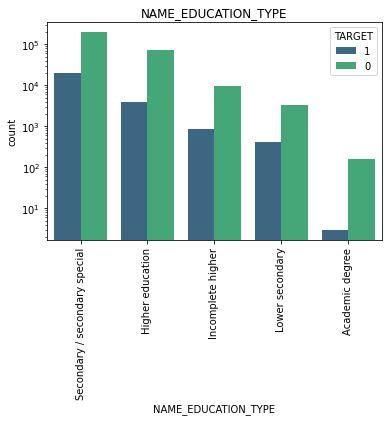

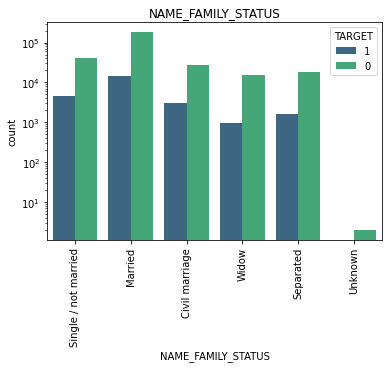

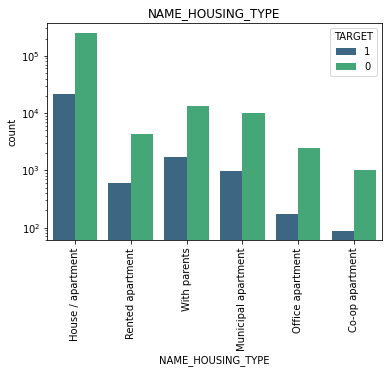

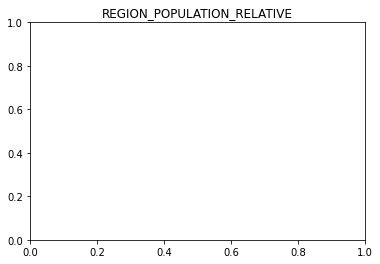

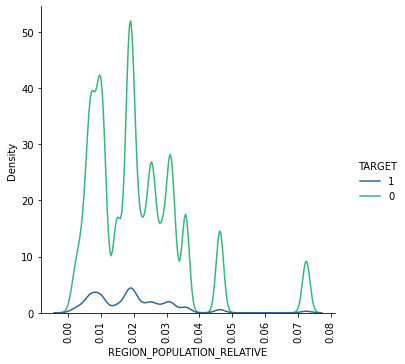

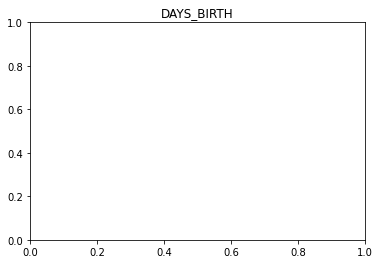

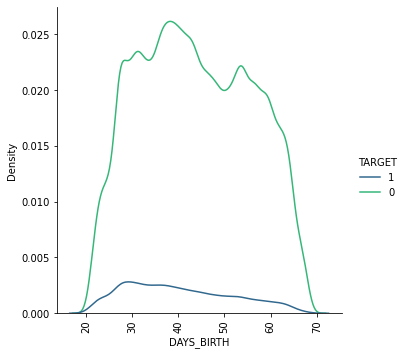

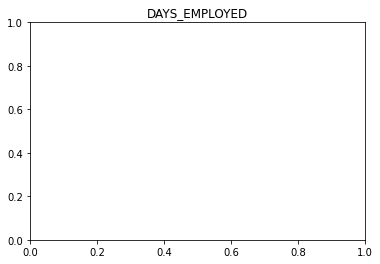

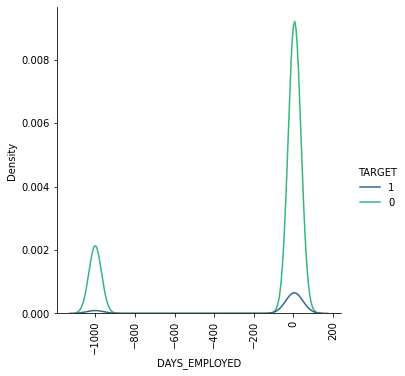

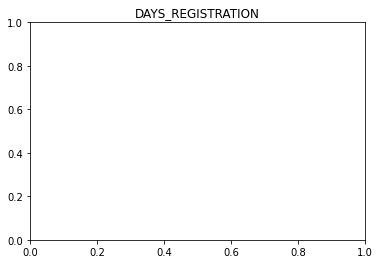

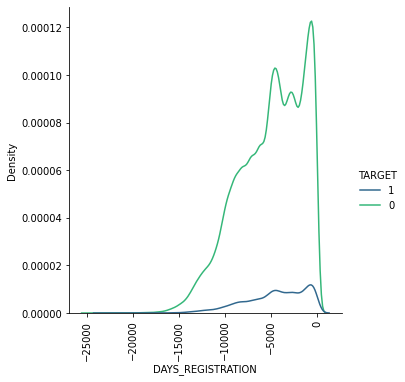

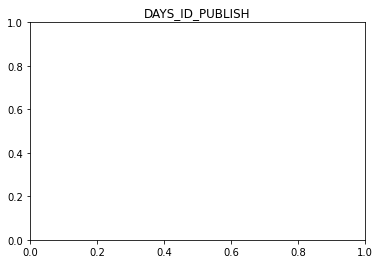

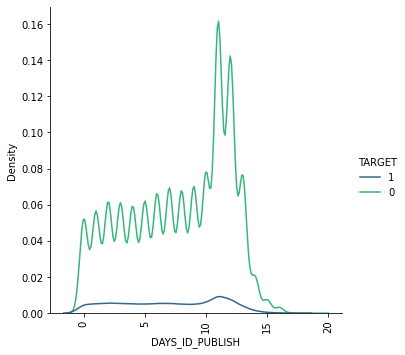

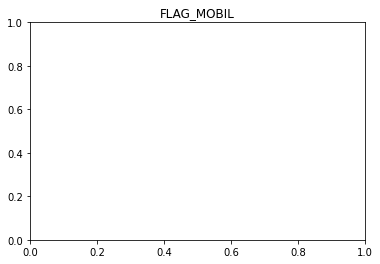

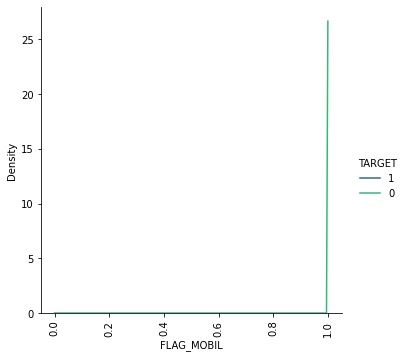

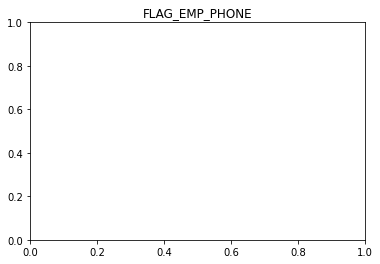

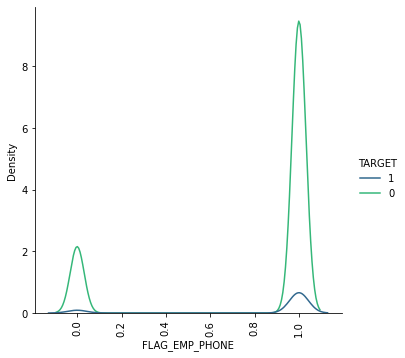

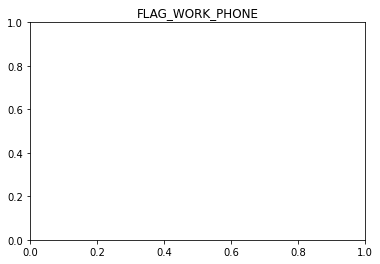

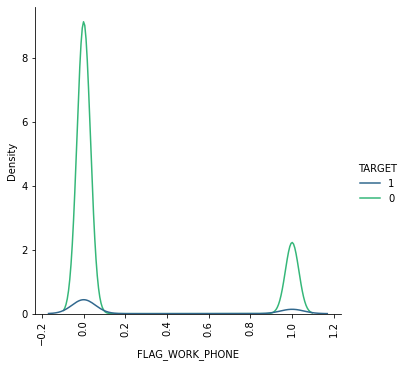

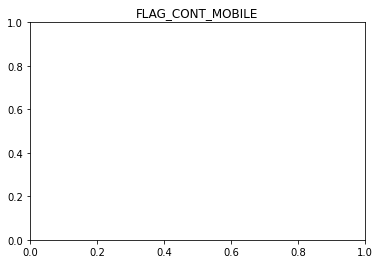

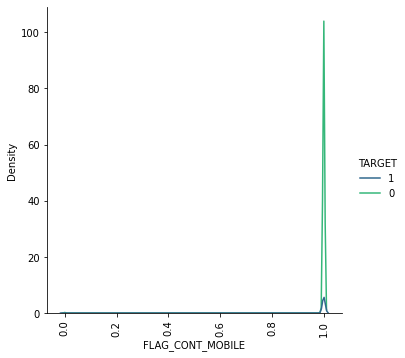

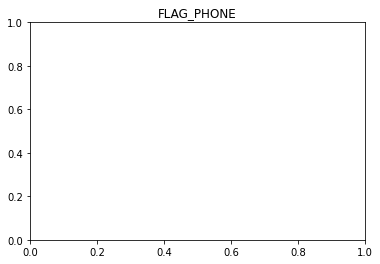

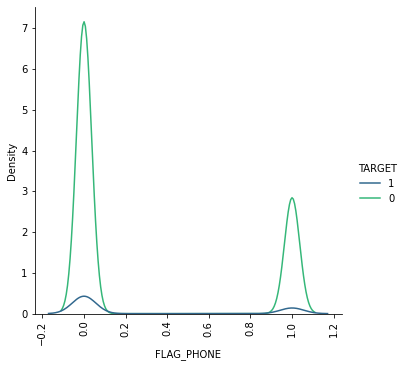

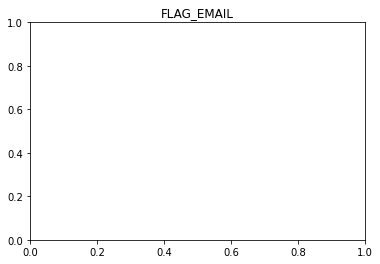

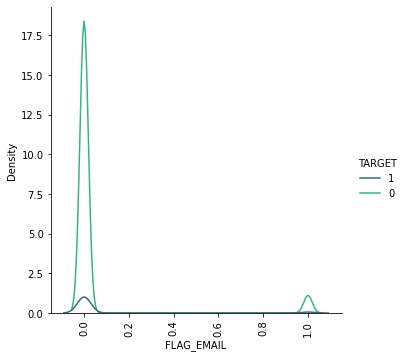

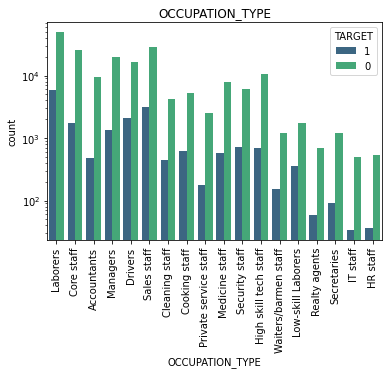

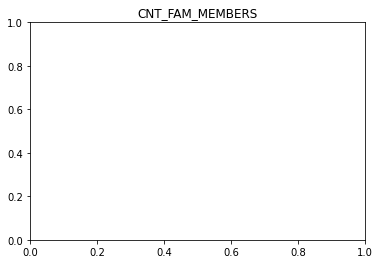

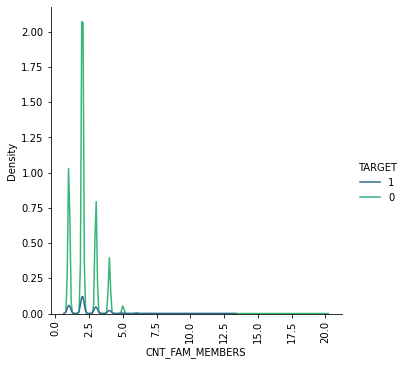

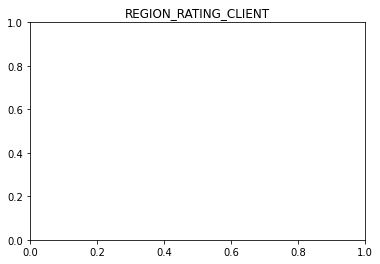

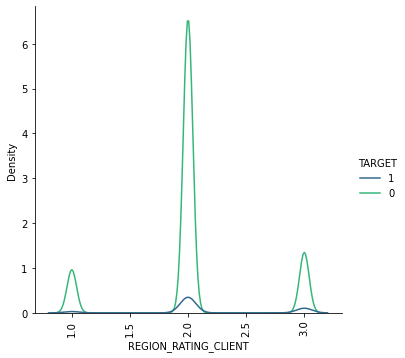

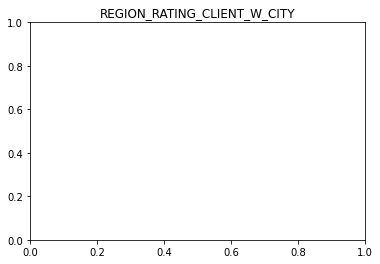

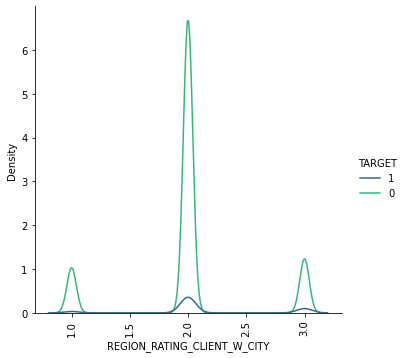

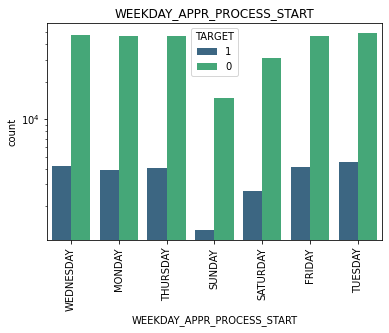

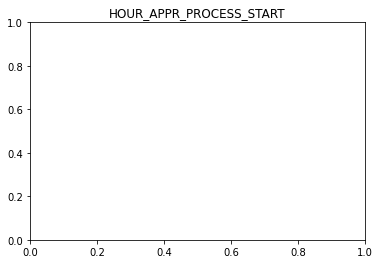

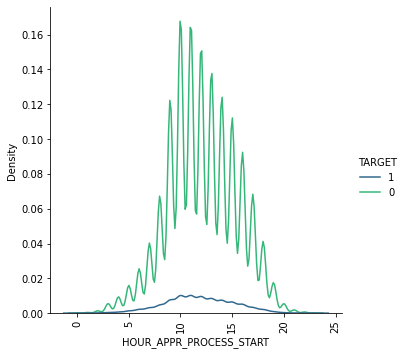

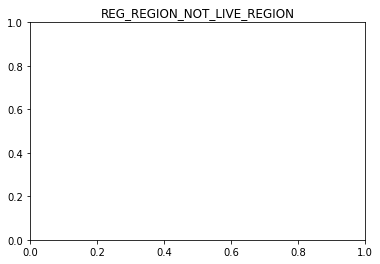

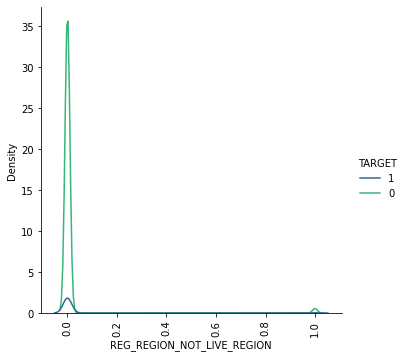

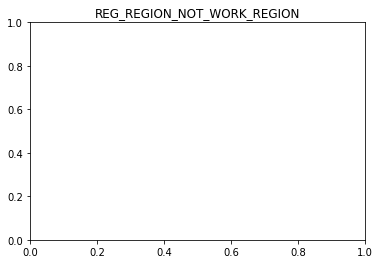

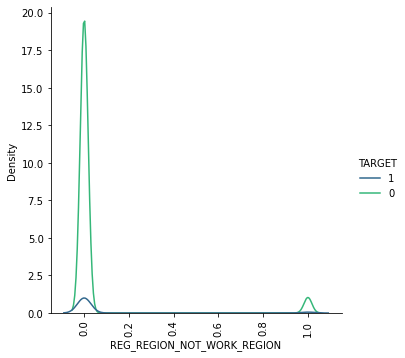

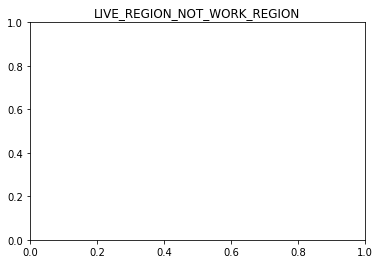

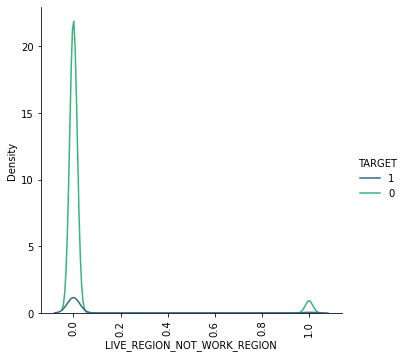

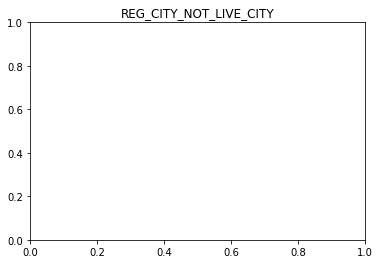

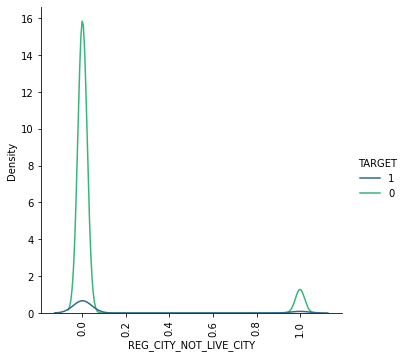

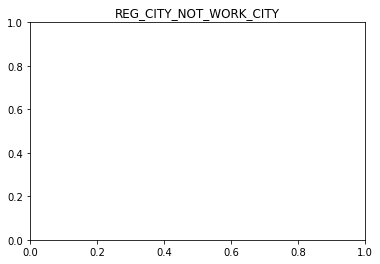

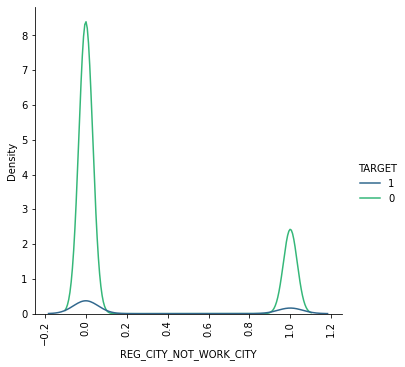

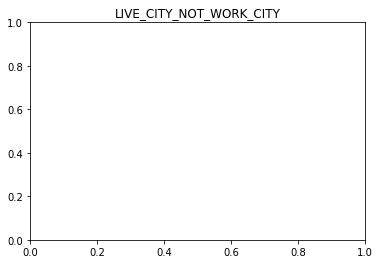

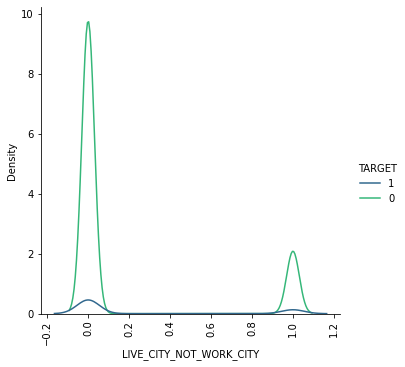

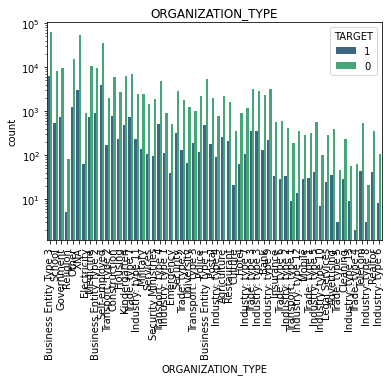

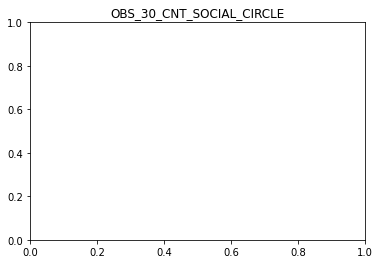

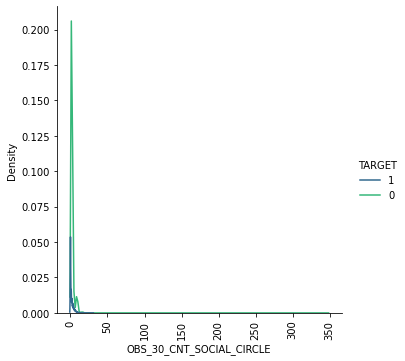

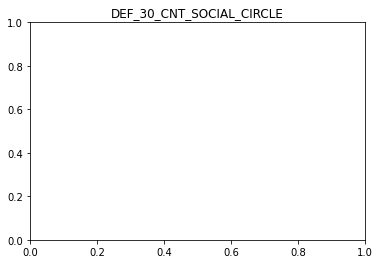

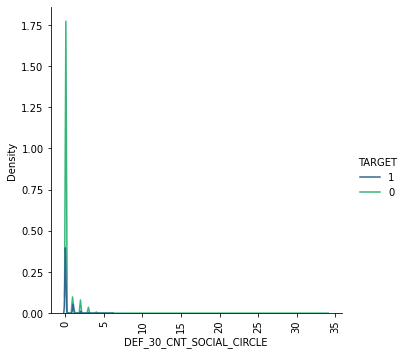

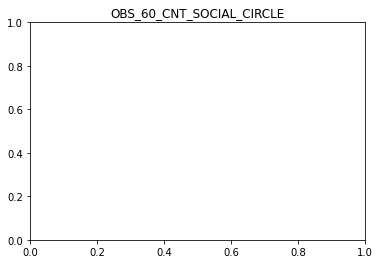

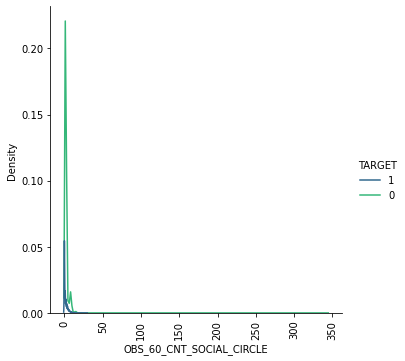

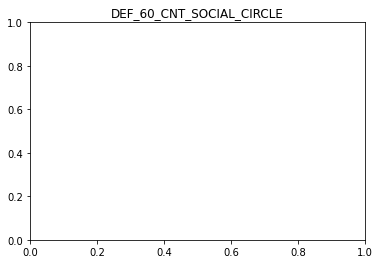

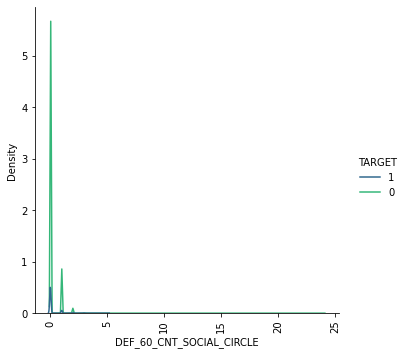

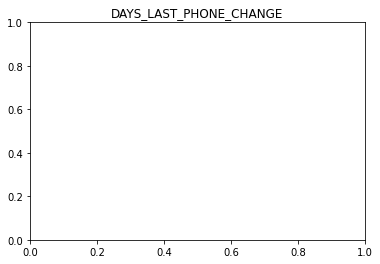

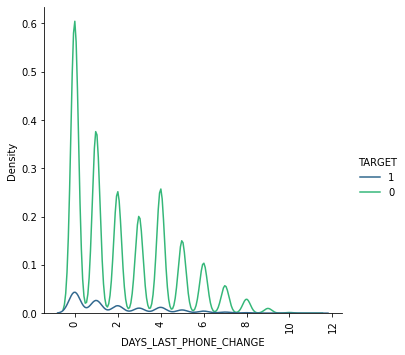

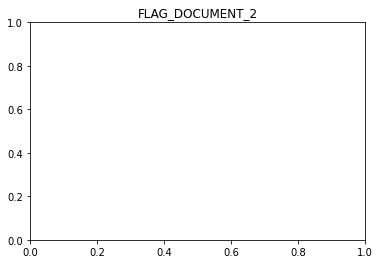

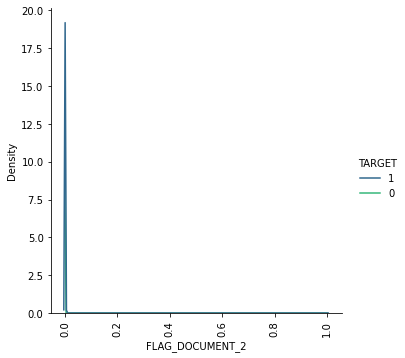

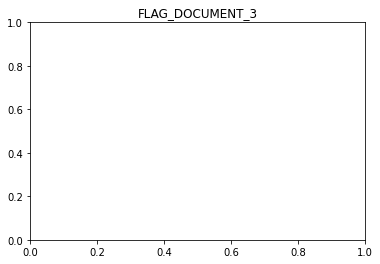

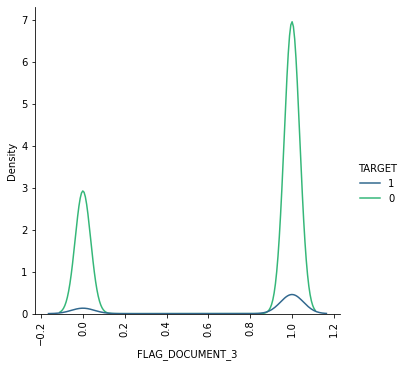

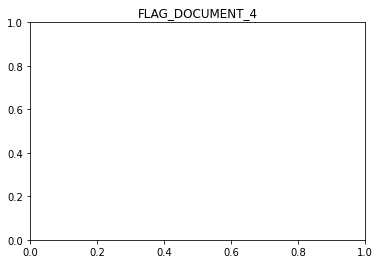

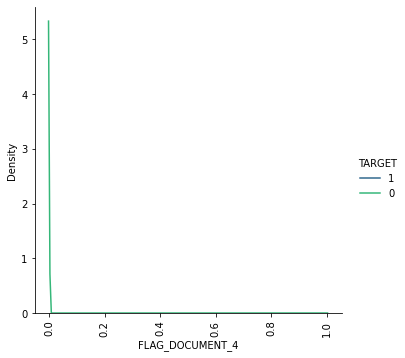

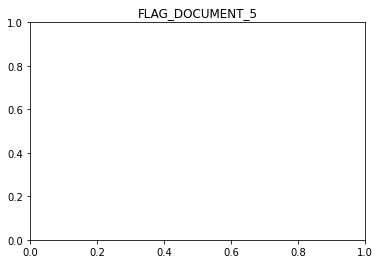

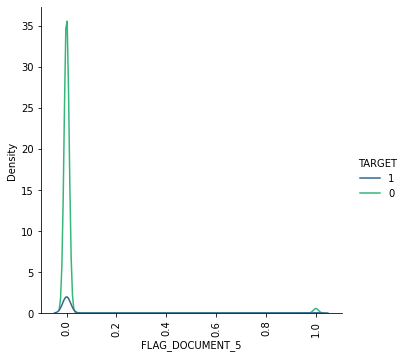

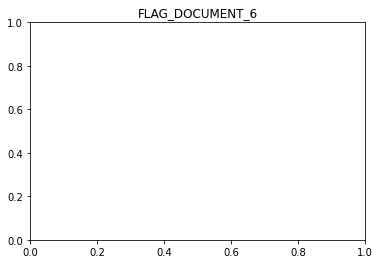

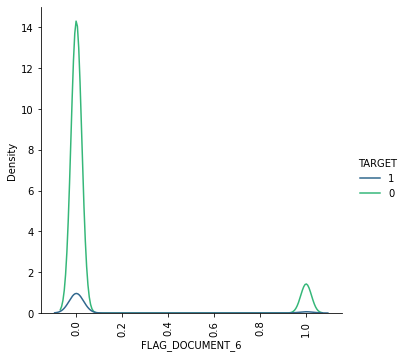

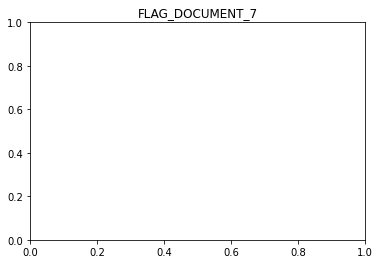

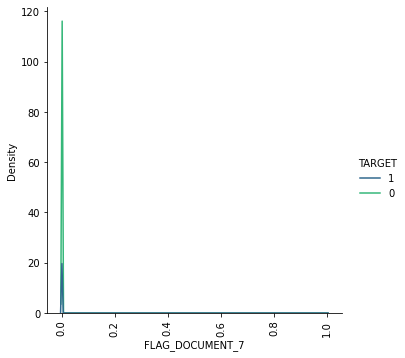

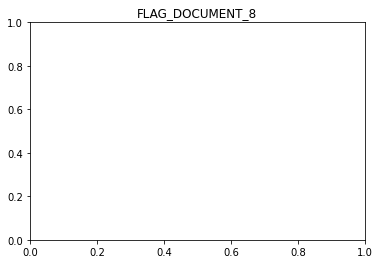

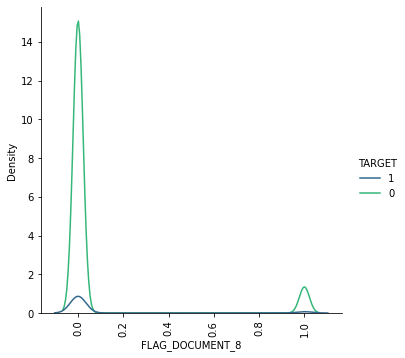

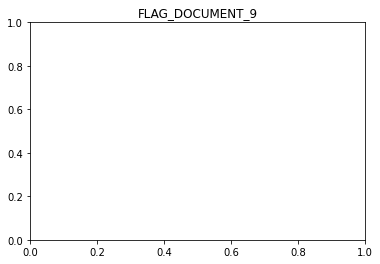

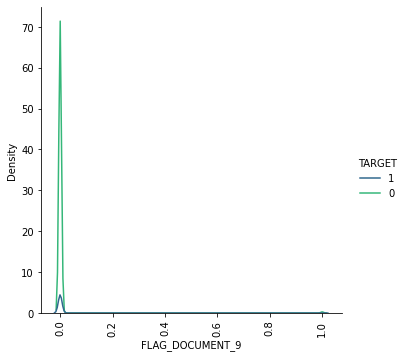

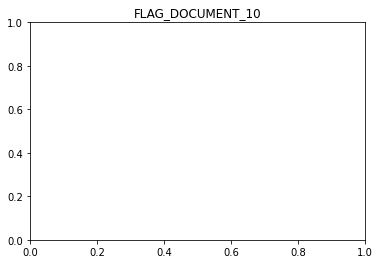

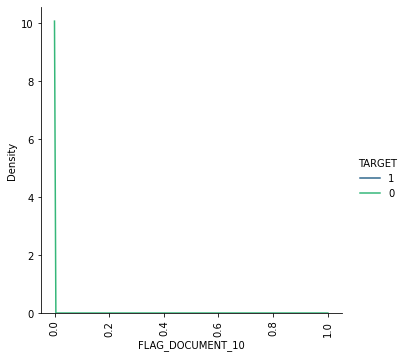

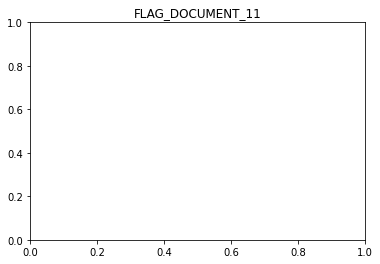

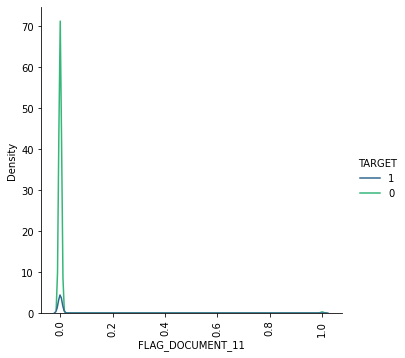

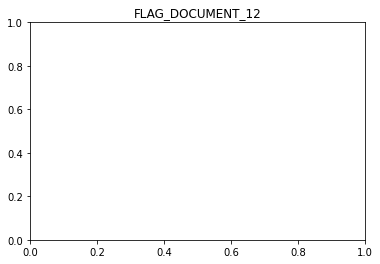

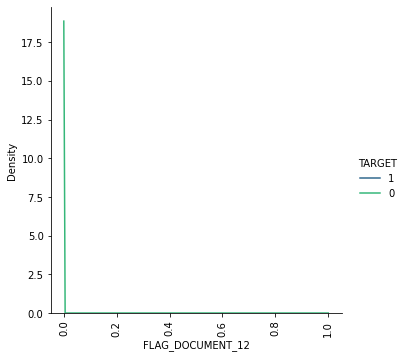

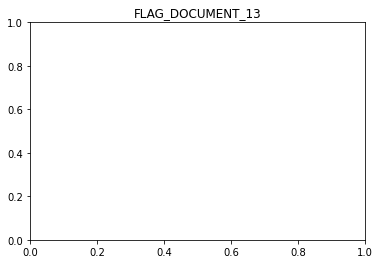

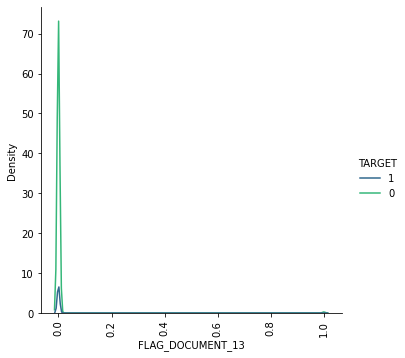

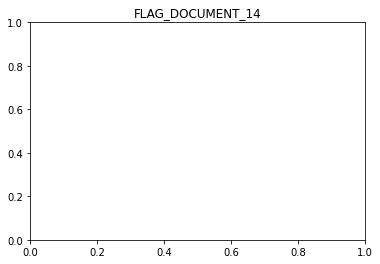

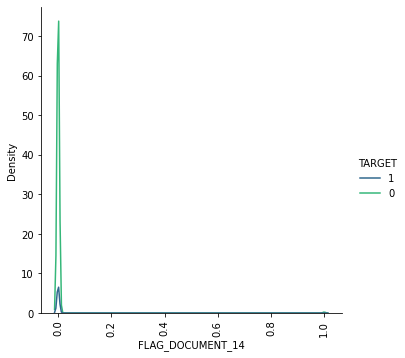

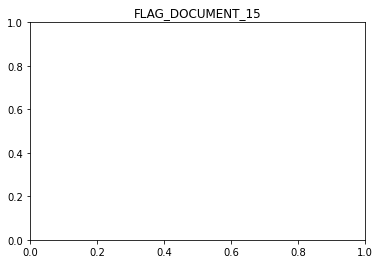

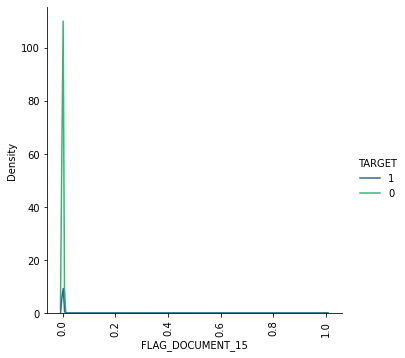

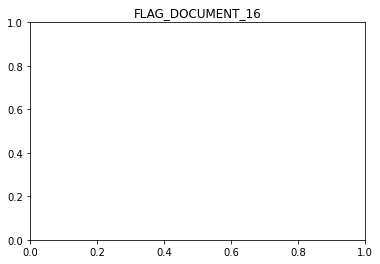

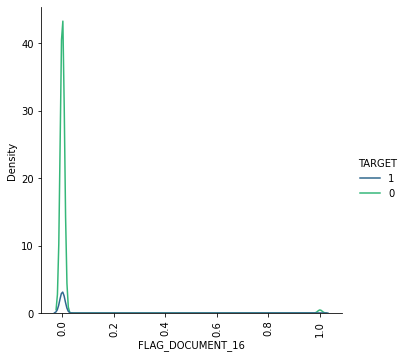

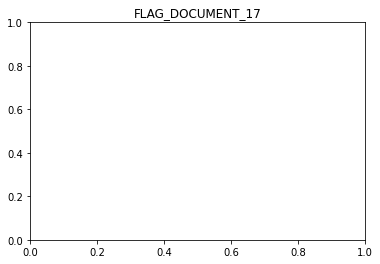

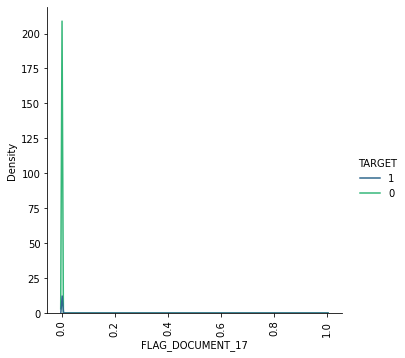

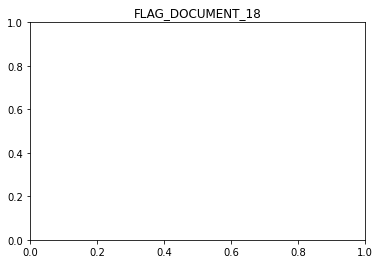

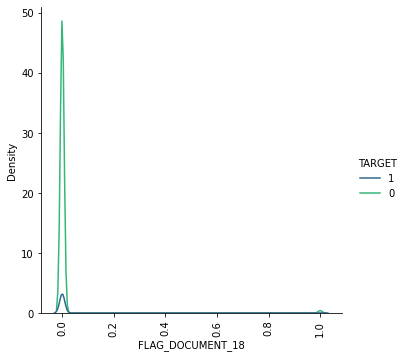

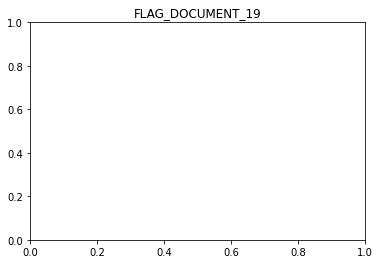

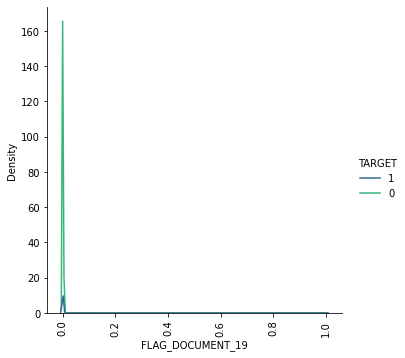

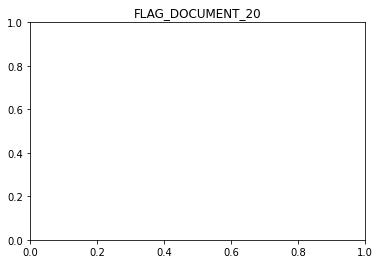

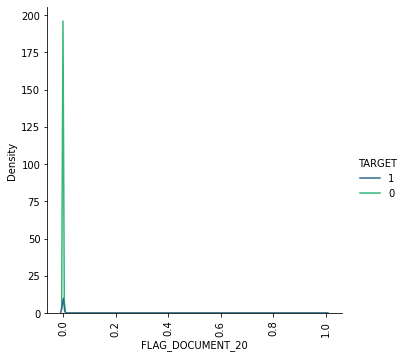

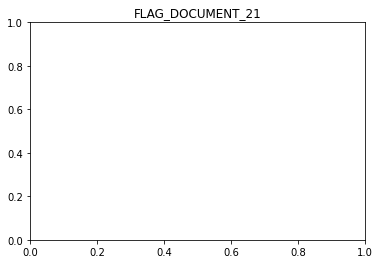

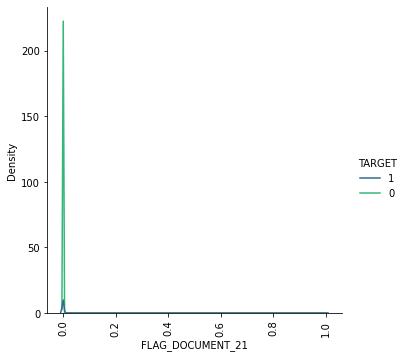

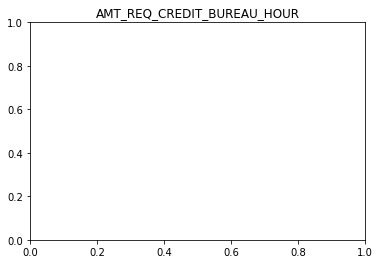

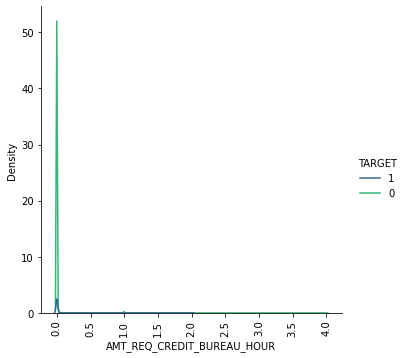

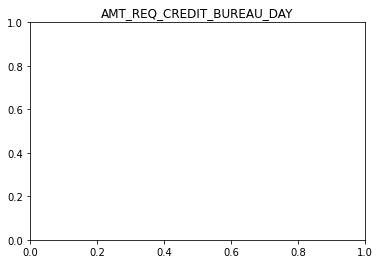

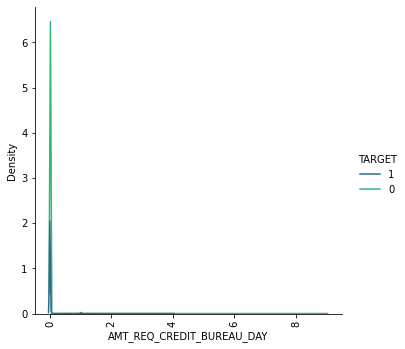

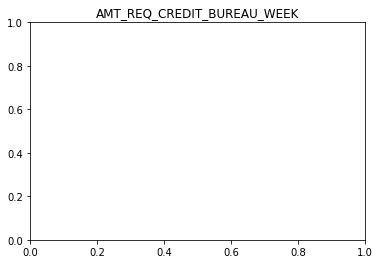

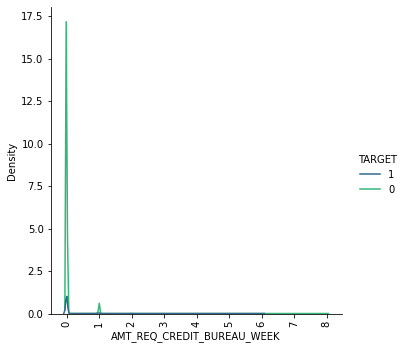

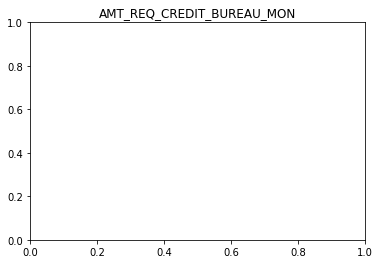

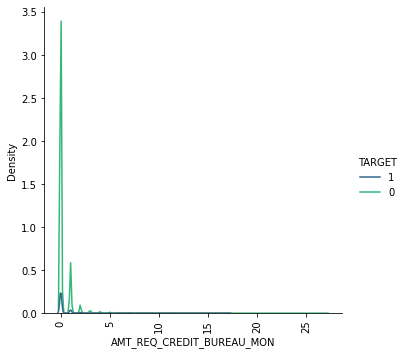

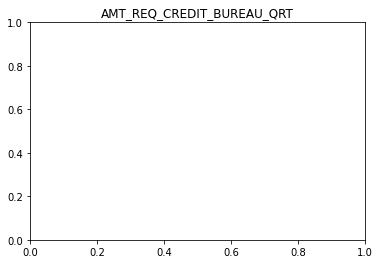

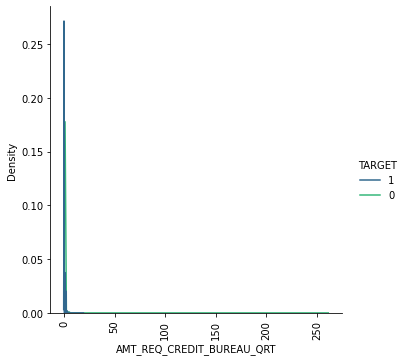

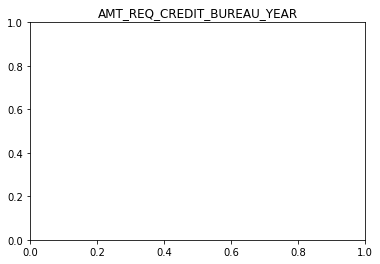

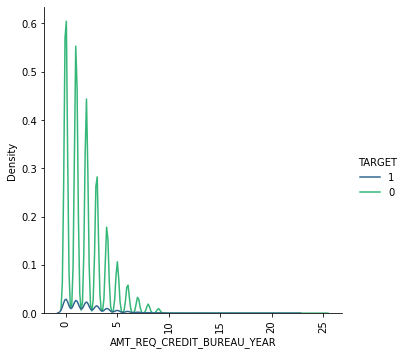

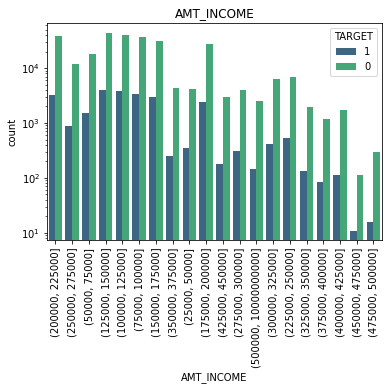

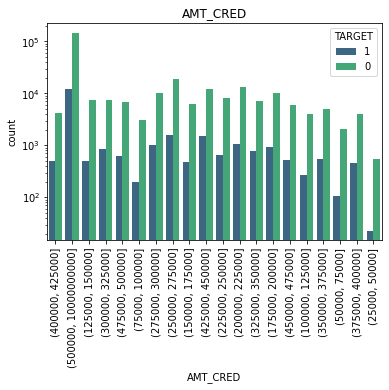

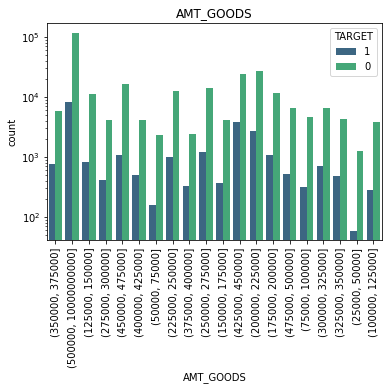

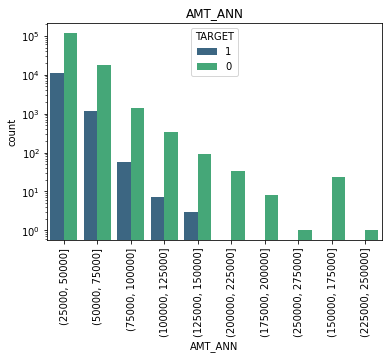

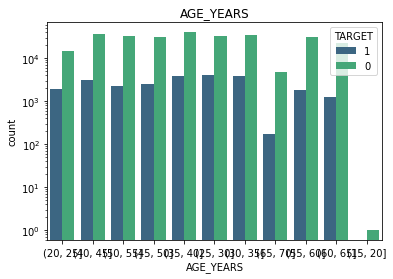

In [21]:
# BIRDS EYE VIEW OF DATA, LOOPING THROUGH COLUMNS AND CREATING GRAPHS
for column in df_application:
    plt.xticks(rotation=90)
    plt.figure(column)
    plt.title(column)
    if is_numeric_dtype(df_application[column]):
        sns.displot(data=df_application, x=column,hue='TARGET', kind='kde',palette="viridis")
    elif is_string_dtype(df_application[column]):
        plt.yscale('log')
        sns.countplot(data=df_application, x=column, hue='TARGET',palette='viridis')

<div style="color:black;
           display:fill;
           border-radius:0.5px;
           background-color:lightblue;
           font-size:20px;
           font-weight:600;
           font-family:Garamond;
           letter-spacing:0.05px">

<p style="padding:px;
              color:black;">
    
<h1> Elaborating few graphs with insights drawn from them.</h1>    
    
</p>
</div>    

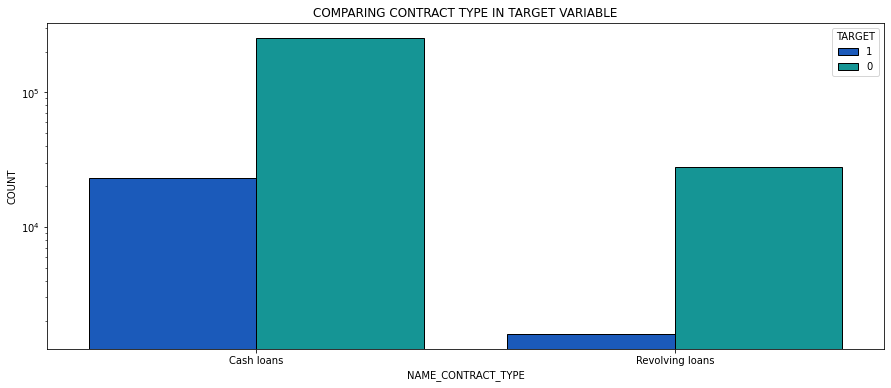

In [22]:
# PLOTTING CONTRACT_TYPE
fig,ax = plt.subplots()
fig.set_size_inches(15,6)
sns.countplot(data=df_application,x='NAME_CONTRACT_TYPE',hue='TARGET',palette='winter',edgecolor='black',
             order=df_application['NAME_CONTRACT_TYPE'].value_counts().index)
plt.title('COMPARING CONTRACT TYPE IN TARGET VARIABLE')
plt.ylabel('COUNT')
plt.yscale('log')

In [23]:
# STATISTICAL ANALYSIS
print(df_application.groupby(['NAME_CONTRACT_TYPE']).TARGET.value_counts(normalize=True).mul(100))
df_application.NAME_CONTRACT_TYPE.value_counts(normalize=True).mul(100)

NAME_CONTRACT_TYPE  TARGET
Cash loans          0         91.654087
                    1          8.345913
Revolving loans     0         94.521671
                    1          5.478329
Name: TARGET, dtype: float64


Cash loans         90.478715
Revolving loans     9.521285
Name: NAME_CONTRACT_TYPE, dtype: float64

<div style="color:black;
           display:fill;
           border-radius:0.5px;
           background-color:papayawhip;
           font-size:20px;
           font-weight:600;
           font-family:Garamond;
           letter-spacing:0.05px">

<p style="padding:px;
              color:black;">

<h4>INSIGHTS:</h4> 
<ul>     
<li>90.48% of clients took cash loans out of which 8.3% were defaulters.</li><br> 
<li>9.52% took revolving loans out of which 5.47% were defaulters.</li><br>
</ul>  
    
</p>
</div>    

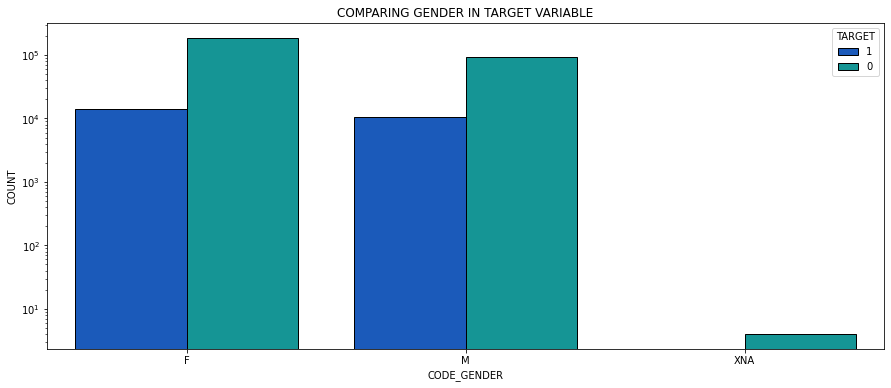

In [24]:
# PLOTTING CODE_GENDER
fig,ax = plt.subplots()
fig.set_size_inches(15,6)
sns.countplot(data=df_application,x='CODE_GENDER',hue='TARGET',palette='winter',edgecolor='black',
             order=df_application['CODE_GENDER'].value_counts().index)
plt.title('COMPARING GENDER IN TARGET VARIABLE')
plt.ylabel('COUNT')
plt.yscale('log')

In [25]:
# STATISTICAL ANALYSIS
print(df_application.groupby(['CODE_GENDER']).TARGET.value_counts(normalize=True).mul(100))
df_application.CODE_GENDER.value_counts(normalize=True).mul(100)

CODE_GENDER  TARGET
F            0          93.000672
             1           6.999328
M            0          89.858080
             1          10.141920
XNA          0         100.000000
Name: TARGET, dtype: float64


F      65.834393
M      34.164306
XNA     0.001301
Name: CODE_GENDER, dtype: float64

<div style="color:black;
           display:fill;
           border-radius:0.5px;
           background-color:papayawhip;
           font-size:20px;
           font-weight:600;
           font-family:Garamond;
           letter-spacing:0.05px">

<p style="padding:px;
              color:black;">

<h4>INSIGHTS:</h4>
<ul>    
<li>65.83% were females out of which 6.99% tend to default.</li><br>
<li>10.14% out of 34.16% males had defaulted.</li><br>

</ul>  
    
</p>
</div>    

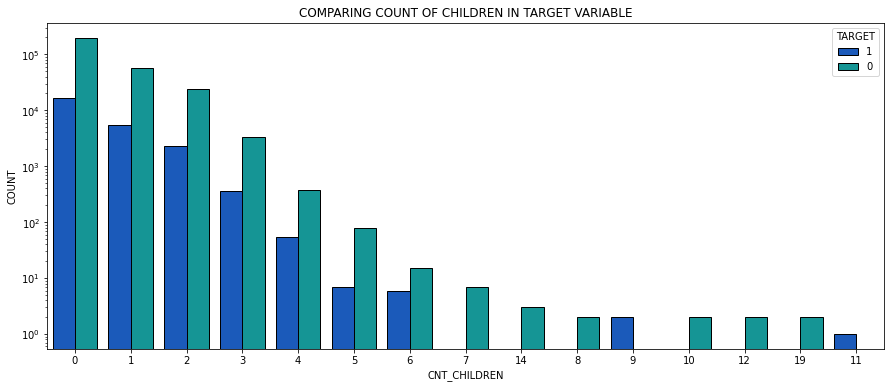

In [26]:
# PLOTTING CNT_CHILDREN
fig,ax = plt.subplots()
fig.set_size_inches(15,6)
sns.countplot(data=df_application,x='CNT_CHILDREN',hue='TARGET',palette='winter',edgecolor='black',
             order=df_application['CNT_CHILDREN'].value_counts().index)
plt.title('COMPARING COUNT OF CHILDREN IN TARGET VARIABLE')
plt.ylabel('COUNT')
plt.yscale('log')

In [27]:
# STATISTICAL ANALYSIS
print(df_application.groupby(['CNT_CHILDREN']).TARGET.value_counts(normalize=True).mul(100))
df_application.CNT_CHILDREN.value_counts(normalize=True).mul(100)

CNT_CHILDREN  TARGET
0             0          92.288191
              1           7.711809
1             0          91.076425
              1           8.923575
2             0          91.278179
              1           8.721821
3             0          90.368577
              1           9.631423
4             0          87.179487
              1          12.820513
5             0          91.666667
              1           8.333333
6             0          71.428571
              1          28.571429
7             0         100.000000
8             0         100.000000
9             1         100.000000
10            0         100.000000
11            1         100.000000
12            0         100.000000
14            0         100.000000
19            0         100.000000
Name: TARGET, dtype: float64


0     70.036844
1     19.875387
2      8.698551
3      1.208737
4      0.139507
5      0.027316
6      0.006829
7      0.002276
14     0.000976
8      0.000650
9      0.000650
10     0.000650
12     0.000650
19     0.000650
11     0.000325
Name: CNT_CHILDREN, dtype: float64

<div style="color:black;
           display:fill;
           border-radius:0.5px;
           background-color:papayawhip;
           font-size:20px;
           font-weight:600;
           font-family:Garamond;
           letter-spacing:0.05px">

<p style="padding:px;
              color:black;">

<h4>INSIGHTS:</h4>
<ul>    
<li>70.03% had no children, 7.71% of them were defaulters.</li><br>
<li>28.57% with 6 children had defaulted.</li><br>
</ul>    
</p>
</div>    

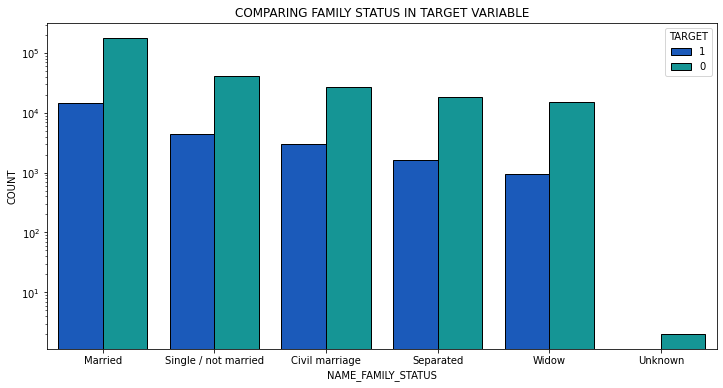

In [28]:
# PLOTTING FAMILY_STATUS
fig,ax = plt.subplots()
fig.set_size_inches(12,6)
sns.countplot(data=df_application,x='NAME_FAMILY_STATUS',hue='TARGET',palette='winter',edgecolor='black',
             order=df_application['NAME_FAMILY_STATUS'].value_counts().index)
plt.title('COMPARING FAMILY STATUS IN TARGET VARIABLE')
plt.ylabel('COUNT')
plt.yscale('log')

In [29]:
# STATISTICAL ANALYSIS
print(df_application.groupby(['NAME_FAMILY_STATUS']).TARGET.value_counts(normalize=True).mul(100))
df_application.NAME_FAMILY_STATUS.value_counts(normalize=True).mul(100)

NAME_FAMILY_STATUS    TARGET
Civil marriage        0          90.055416
                      1           9.944584
Married               0          92.440132
                      1           7.559868
Separated             0          91.805766
                      1           8.194234
Single / not married  0          90.192325
                      1           9.807675
Unknown               0         100.000000
Widow                 0          94.175783
                      1           5.824217
Name: TARGET, dtype: float64


Married                 63.878040
Single / not married    14.778008
Civil marriage           9.682580
Separated                6.429038
Widow                    5.231683
Unknown                  0.000650
Name: NAME_FAMILY_STATUS, dtype: float64

<div style="color:black;
           display:fill;
           border-radius:0.5px;
           background-color:papayawhip;
           font-size:20px;
           font-weight:600;
           font-family:Garamond;
           letter-spacing:0.05px">

<p style="padding:px;
              color:black;">

<h4>INSIGHTS:</h4>
    <ul>
<li>63.88% were married of which 7.56% defaulted.</li><br>
<li>9.94% of Civil marriage and 9.81% of single/not married had defaulted.</li><br>
<li>5.8%of widows tend to default.</li><br>
</ul>    
</p>
</div>    

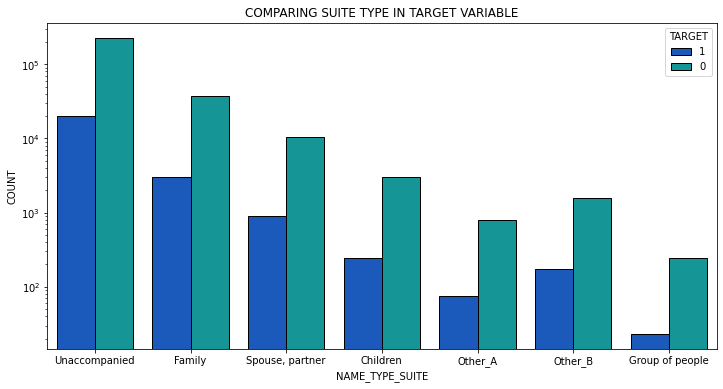

In [30]:
# PLOTTING SUITE_TYPE
fig,ax = plt.subplots()
fig.set_size_inches(12,6)
sns.countplot(data=df_application,x='NAME_TYPE_SUITE',hue='TARGET',palette='winter',edgecolor='black')
plt.title('COMPARING SUITE TYPE IN TARGET VARIABLE')
plt.ylabel('COUNT')
plt.yscale('log')

In [31]:
# STATISTICAL ANALYSIS
print(df_application.groupby(['NAME_TYPE_SUITE']).TARGET.value_counts(normalize=True).mul(100))
df_application.NAME_TYPE_SUITE.value_counts(normalize=True).mul(100)

NAME_TYPE_SUITE  TARGET
Children         0         92.623202
                 1          7.376798
Family           0         92.505417
                 1          7.494583
Group of people  0         91.512915
                 1          8.487085
Other_A          0         91.224018
                 1          8.775982
Other_B          0         90.169492
                 1          9.830508
Spouse, partner  0         92.128408
                 1          7.871592
Unaccompanied    0         91.816953
                 1          8.183047
Name: TARGET, dtype: float64


Unaccompanied      81.159562
Family             13.111205
Spouse, partner     3.713029
Children            1.066884
Other_B             0.578018
Other_A             0.282804
Group of people     0.088499
Name: NAME_TYPE_SUITE, dtype: float64

<div style="color:black;
           display:fill;
           border-radius:0.5px;
           background-color:papayawhip;
           font-size:20px;
           font-weight:600;
           font-family:Garamond;
           letter-spacing:0.05px">

<p style="padding:px;
              color:black;">

<h4>INSIGHTS:</h4>
 <ul>    
 <li>81.16% were unaccompanied while applying for loan of which 8.18% had defaulted.</li><br>
<li>9.83% of Other_B had also defaulted.</li><br>

 </ul>
  
    
</p>
</div>    

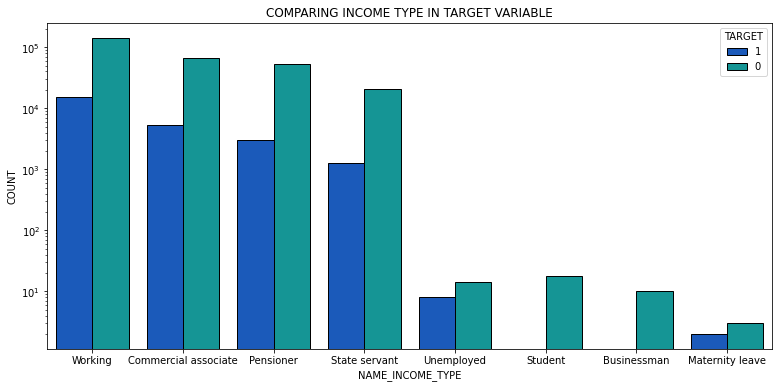

In [32]:
# PLOTTING INCOME_TYPE
fig,ax = plt.subplots()
fig.set_size_inches(13,6)
sns.countplot(data=df_application,x='NAME_INCOME_TYPE',hue='TARGET',palette='winter',edgecolor='black',
             order=df_application['NAME_INCOME_TYPE'].value_counts().index)
plt.title('COMPARING INCOME TYPE IN TARGET VARIABLE')
plt.ylabel('COUNT')
plt.yscale('log')

In [33]:
# STATISTICAL ANALYSIS
print(df_application.groupby(['NAME_INCOME_TYPE']).TARGET.value_counts(normalize=True).mul(100))
df_application.NAME_INCOME_TYPE.value_counts(normalize=True).mul(100)

NAME_INCOME_TYPE      TARGET
Businessman           0         100.000000
Commercial associate  0          92.515743
                      1           7.484257
Maternity leave       0          60.000000
                      1          40.000000
Pensioner             0          94.613634
                      1           5.386366
State servant         0          94.245035
                      1           5.754965
Student               0         100.000000
Unemployed            0          63.636364
                      1          36.363636
Working               0          90.411528
                      1           9.588472
Name: TARGET, dtype: float64


Working                 51.631974
Commercial associate    23.289248
Pensioner               18.003258
State servant            7.057634
Unemployed               0.007154
Student                  0.005853
Businessman              0.003252
Maternity leave          0.001626
Name: NAME_INCOME_TYPE, dtype: float64

<div style="color:black;
           display:fill;
           border-radius:0.5px;
           background-color:papayawhip;
           font-size:20px;
           font-weight:600;
           font-family:Garamond;
           letter-spacing:0.05px">

<p style="padding:px;
              color:black;">

<h4>INSIGHTS:</h4> 
    <ul>
<li>51.63% of clients have working income type of which 9.59% have defaulted.</li><br>
<li>40 % of Maternity leave and 36.36% of unemployed had defaulted.</li><br>
<li>Student and business type do not seem default.</li><br>

</ul>
  
    
</p>
</div>    

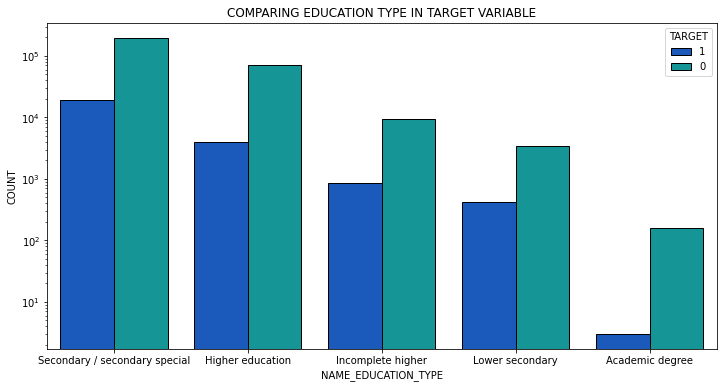

In [34]:
# PLOTTING EDUCATION_TYPE
fig,ax = plt.subplots()
fig.set_size_inches(12,6)
sns.countplot(data=df_application,x='NAME_EDUCATION_TYPE',hue='TARGET',palette='winter',edgecolor='black')
plt.title('COMPARING EDUCATION TYPE IN TARGET VARIABLE')
plt.ylabel('COUNT')
plt.yscale('log')

In [35]:
# STATISTICAL ANALYSIS
print(df_application.groupby(['NAME_EDUCATION_TYPE']).TARGET.value_counts(normalize=True).mul(100))
df_application.NAME_EDUCATION_TYPE.value_counts(normalize=True).mul(100)

NAME_EDUCATION_TYPE            TARGET
Academic degree                0         98.170732
                               1          1.829268
Higher education               0         94.644885
                               1          5.355115
Incomplete higher              0         91.515034
                               1          8.484966
Lower secondary                0         89.072327
                               1         10.927673
Secondary / secondary special  0         91.060071
                               1          8.939929
Name: TARGET, dtype: float64


Secondary / secondary special    71.018923
Higher education                 24.344820
Incomplete higher                 3.341994
Lower secondary                   1.240931
Academic degree                   0.053331
Name: NAME_EDUCATION_TYPE, dtype: float64

<div style="color:black;
           display:fill;
           border-radius:0.5px;
           background-color:papayawhip;
           font-size:20px;
           font-weight:600;
           font-family:Garamond;
           letter-spacing:0.05px">

<p style="padding:px;
              color:black;">
<h4>INSIGHTS:</h4>
    <ul>
<li>71.01% have Secondary/secondary special education and 8.94% of them have defaulted along with 10.92% of people with Lower secondary education.</li><br>
<li>5.35% of  Higher education and 1.83% of Academic degree had defaulted.</li><br>
</ul>

</p>
</div>    

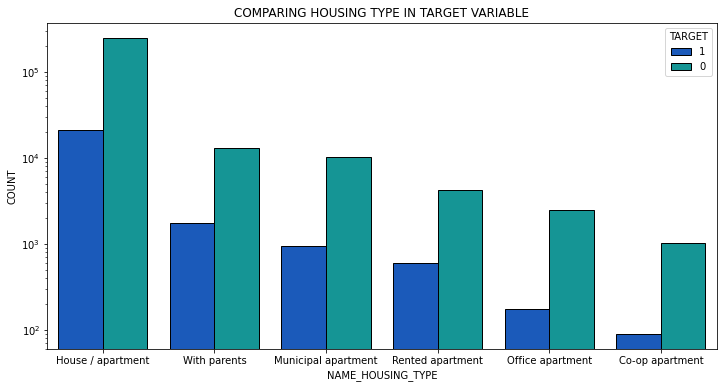

In [36]:
# PLOTTING HOUSING_TYPE
fig,ax = plt.subplots()
fig.set_size_inches(12,6)
sns.countplot(data=df_application,x='NAME_HOUSING_TYPE',hue='TARGET',palette='winter',edgecolor='black',
             order=df_application['NAME_HOUSING_TYPE'].value_counts().index)
plt.title('COMPARING HOUSING TYPE IN TARGET VARIABLE')
plt.ylabel('COUNT')
plt.yscale('log')

In [37]:
# STATISTICAL ANALYSIS
print(df_application.groupby(['NAME_HOUSING_TYPE']).TARGET.value_counts(normalize=True).mul(100))
df_application.NAME_HOUSING_TYPE.value_counts(normalize=True).mul(100)

NAME_HOUSING_TYPE    TARGET
Co-op apartment      0         92.067736
                     1          7.932264
House / apartment    0         92.204289
                     1          7.795711
Municipal apartment  0         91.460252
                     1          8.539748
Office apartment     0         93.427589
                     1          6.572411
Rented apartment     0         87.686949
                     1         12.313051
With parents         0         88.301887
                     1         11.698113
Name: TARGET, dtype: float64


House / apartment      88.734387
With parents            4.825844
Municipal apartment     3.636618
Rented apartment        1.587260
Office apartment        0.851026
Co-op apartment         0.364865
Name: NAME_HOUSING_TYPE, dtype: float64

<div style="color:black;
           display:fill;
           border-radius:0.5px;
           background-color:papayawhip;
           font-size:20px;
           font-weight:600;
           font-family:Garamond;
           letter-spacing:0.05px">

<p style="padding:px;
              color:black;">

<h4>INSIGHTS:</h4>
<ul>
<li>Of 88.73% who had house/apartment, 7.8% defaulted.</li><br>
<li>Approximately 12% of those who lived in rented apartment or live with parents have defaulted.</li><br>
<li>12.31% of those with Rented apartment and 11.7% of those with parents had defaulted.</li><br>    
</ul>
 
</p>
</div>    

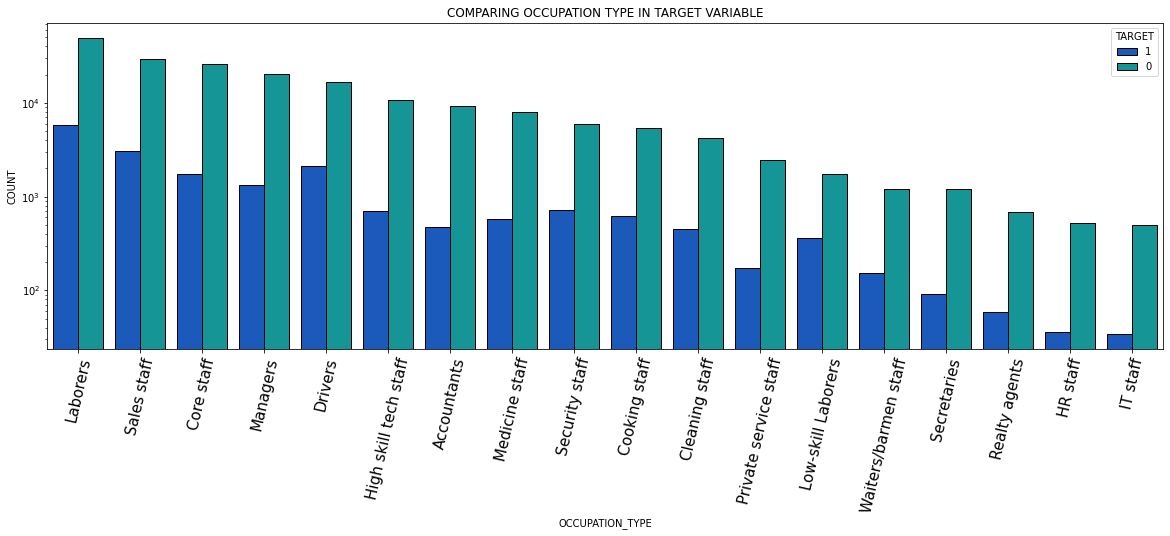

In [38]:
# PLOTTING OCCUPATION_TYPE
fig,ax = plt.subplots()
fig.set_size_inches(20,6)
sns.countplot(data=df_application,x='OCCUPATION_TYPE',hue='TARGET',palette='winter',edgecolor='black',
             order=df_application['OCCUPATION_TYPE'].value_counts().index)
plt.title('COMPARING OCCUPATION TYPE IN TARGET VARIABLE')
plt.xticks(ha='center', rotation=77,fontsize=15)
plt.ylabel('COUNT')
plt.yscale('log')

In [39]:
# STATISTICAL ANALYSIS
print(df_application.groupby(['OCCUPATION_TYPE']).TARGET.value_counts(normalize=True).mul(100))
df_application.OCCUPATION_TYPE.value_counts(normalize=True)

OCCUPATION_TYPE        TARGET
Accountants            0         95.169673
                       1          4.830327
Cleaning staff         0         90.393295
                       1          9.606705
Cooking staff          0         89.556004
                       1         10.443996
Core staff             0         93.696046
                       1          6.303954
Drivers                0         88.673870
                       1         11.326130
HR staff               0         93.605684
                       1          6.394316
High skill tech staff  0         93.840070
                       1          6.159930
IT staff               0         93.536122
                       1          6.463878
Laborers               0         89.421230
                       1         10.578770
Low-skill Laborers     0         82.847587
                       1         17.152413
Managers               0         93.785972
                       1          6.214028
Medicine staff         0

Laborers                 0.261396
Sales staff              0.152056
Core staff               0.130589
Managers                 0.101227
Drivers                  0.088116
High skill tech staff    0.053903
Accountants              0.046481
Medicine staff           0.040437
Security staff           0.031835
Cooking staff            0.028164
Cleaning staff           0.022040
Private service staff    0.012562
Low-skill Laborers       0.009914
Waiters/barmen staff     0.006385
Secretaries              0.006181
Realty agents            0.003557
HR staff                 0.002667
IT staff                 0.002491
Name: OCCUPATION_TYPE, dtype: float64

<div style="color:black;
           display:fill;
           border-radius:0.5px;
           background-color:papayawhip;
           font-size:20px;
           font-weight:600;
           font-family:Garamond;
           letter-spacing:0.05px">

<p style="padding:px;
              color:black;">
<h4>INSIGHTS:</h4> 
<ul>
<li>Labourers constitute 26.14% of which 10.58% and 17.15% of Low-skill labourers seem to have defaulted.</li><br>
   
</ul>
   
</p>
</div>    

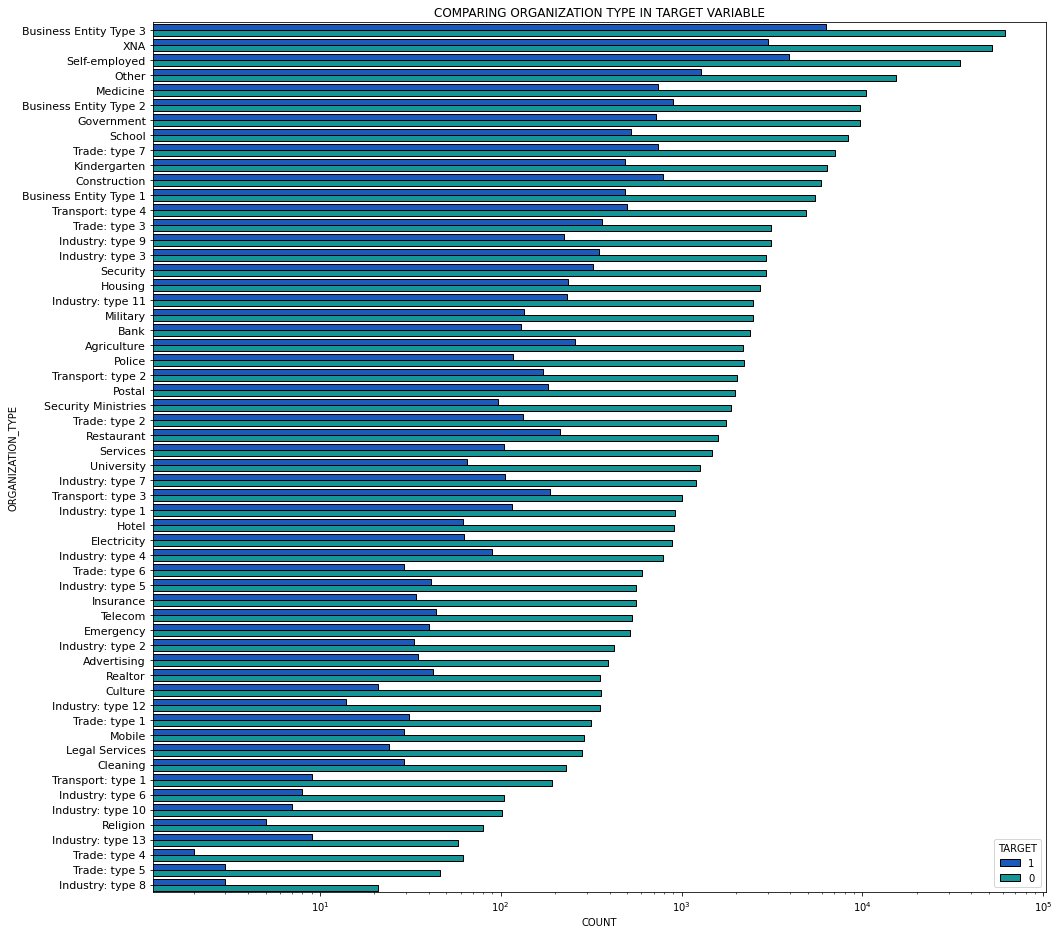

In [40]:
# PLOTTING ORGANIZATION_TYPE
fig,ax = plt.subplots()
fig.set_size_inches(16,16)
sns.countplot(data=df_application,y='ORGANIZATION_TYPE',hue='TARGET',palette='winter',edgecolor='black',
             order=df_application['ORGANIZATION_TYPE'].value_counts().index)
plt.title('COMPARING ORGANIZATION TYPE IN TARGET VARIABLE')
plt.yticks(fontsize=11)
plt.xlabel('COUNT')
plt.xscale('log')

In [41]:
# STATISTICAL ANALYSIS
print(df_application.groupby(['ORGANIZATION_TYPE']).TARGET.value_counts(normalize=True).mul(100))
df_application.ORGANIZATION_TYPE.value_counts(normalize=True).mul(100)

ORGANIZATION_TYPE       TARGET
Advertising             0         91.841492
                        1          8.158508
Agriculture             0         89.527302
                        1         10.472698
Bank                    0         94.814519
                        1          5.185481
Business Entity Type 1  0         91.861631
                        1          8.138369
Business Entity Type 2  0         91.471619
                        1          8.528381
Business Entity Type 3  0         90.700377
                        1          9.299623
Cleaning                0         88.846154
                        1         11.153846
Construction            0         88.320190
                        1         11.679810
Culture                 0         94.459103
                        1          5.540897
Electricity             0         93.368421
                        1          6.631579
Emergency               0         92.857143
                        1          7.142857
G

Business Entity Type 3    22.110429
XNA                       18.007161
Self-employed             12.491260
Other                      5.425172
Medicine                   3.639870
Business Entity Type 2     3.431747
Government                 3.383294
School                     2.891929
Trade: type 7              2.546576
Kindergarten               2.237318
Construction               2.185613
Business Entity Type 1     1.945947
Transport: type 4          1.755384
Trade: type 3              1.135569
Industry: type 9           1.095245
Industry: type 3           1.065978
Security                   1.055897
Housing                    0.961917
Industry: type 11          0.879318
Military                   0.856555
Bank                       0.815255
Agriculture                0.798020
Police                     0.761274
Transport: type 2          0.716722
Postal                     0.701438
Security Ministries        0.641928
Trade: type 2              0.617864
Restaurant                 0

<div style="color:black;
           display:fill;
           border-radius:0.5px;
           background-color:papayawhip;
           font-size:20px;
           font-weight:600;
           font-family:Garamond;
           letter-spacing:0.05px">

<p style="padding:px;
              color:black;">
<h4>INSIGHTS:</h4>
<ul>
<li>Business Type 3 constitute 22.11% of clients. Of which 9.29% had defaulted.</li><br>
<li>15.75% of Transport Type 3, 13.43% of Industry Type 13, 12.5% of Industry Type 8 were among top defaulters.</li><br>
   
</ul>
</p>
</div>    

Text(0, 0.5, 'COUNT')

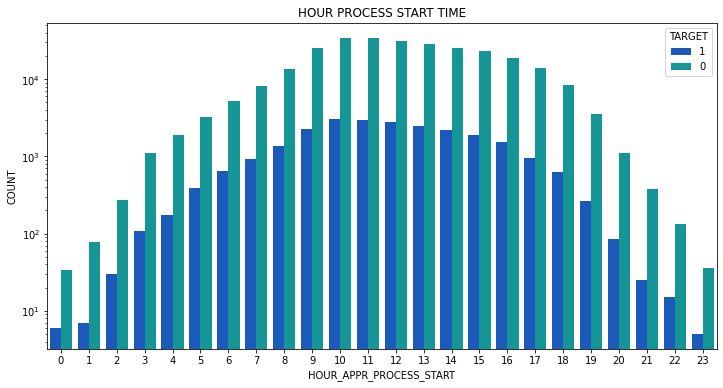

In [42]:
# PLOTTING PROCESS_START HOUR
fig,ax = plt.subplots()
fig.set_size_inches(12,6)
sns.countplot(data=df_application,x='HOUR_APPR_PROCESS_START',hue='TARGET',palette='winter')
plt.title('HOUR PROCESS START TIME')
plt.yscale('log')
plt.ylabel('COUNT')

In [43]:
# STATISTICAL ANALYSIS
print(df_application.groupby(['HOUR_APPR_PROCESS_START']).TARGET.value_counts(normalize=True).mul(100))
df_application.HOUR_APPR_PROCESS_START.value_counts(normalize=True).mul(100)

HOUR_APPR_PROCESS_START  TARGET
0                        0         85.000000
                         1         15.000000
1                        0         91.860465
                         1          8.139535
2                        0         90.163934
                         1          9.836066
3                        0         91.300813
                         1          8.699187
4                        0         91.722488
                         1          8.277512
5                        0         89.417262
                         1         10.582738
6                        0         88.959261
                         1         11.040739
7                        0         89.957288
                         1         10.042712
8                        0         90.923514
                         1          9.076486
9                        0         91.794479
                         1          8.205521
10                       0         91.978156
                       

10    12.266878
11    12.106559
12    11.132285
13    10.067607
14     9.001954
9      8.905047
15     8.077435
16     6.629031
8      4.919174
17     4.845355
7      2.969325
18     2.942659
6      1.899769
19     1.251337
5      1.183047
4      0.679650
3      0.399986
20     0.388929
21     0.131703
2      0.099183
22     0.048779
1      0.027966
23     0.013333
0      0.013008
Name: HOUR_APPR_PROCESS_START, dtype: float64

<div style="color:black;
           display:fill;
           border-radius:0.5px;
           background-color:papayawhip;
           font-size:20px;
           font-weight:600;
           font-family:Garamond;
           letter-spacing:0.05px">

<p style="padding:px;
              color:black;">
<h4>INSIGHTS:</h4>
<ul>
<li>Most process starts at 10-12.</li><br>
<li>Most defaulted at 0, 5, 6, 7 and 23 hrs</li><br>
   
</ul>
   
</p>
</div> 

<div style="color:black;
           display:fill;
           border-radius:0.5px;
           background-color:lightblue;
           font-size:20px;
           font-weight:600;
           font-family:Garamond;
           letter-spacing:0.05px">

<p style="padding:px;
              color:black;">
    
<h1>Bivariate Analysis</h1>
<ul>
<li>Bivariate analysis shows relation between two variables which can be categorical, numerical or both.</li><br>
<li>We will analyze few important features in this.</li><br>
<li>We will mainly study defaulters for insights.</li><br>   
</ul>    
</p>
</div>    

# GENDER ANALYSIS

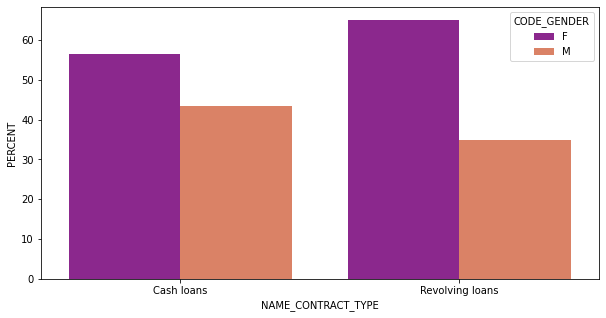

In [44]:
# DISTRIBUTION OF GENDER IN CONTRACT TYPE
fig, axes = plt.subplots()
fig.set_size_inches(10,5)
bi_chart = df_default['CODE_GENDER'].groupby(df_default['NAME_CONTRACT_TYPE']).value_counts(normalize=True).mul(100).rename('PERCENT').reset_index()
bar_chart = sns.barplot(x='NAME_CONTRACT_TYPE', y='PERCENT', hue='CODE_GENDER', palette='plasma', data=bi_chart)


In [45]:
# STATISTICAL ANALYSIS
print(df_default.groupby(['CODE_GENDER']).NAME_CONTRACT_TYPE.value_counts(normalize=True).mul(100))
df_default.groupby(['NAME_CONTRACT_TYPE']).CODE_GENDER.value_counts(normalize=True).mul(100)

CODE_GENDER  NAME_CONTRACT_TYPE
F            Cash loans            92.639379
             Revolving loans        7.360621
M            Cash loans            94.734866
             Revolving loans        5.265134
Name: NAME_CONTRACT_TYPE, dtype: float64


NAME_CONTRACT_TYPE  CODE_GENDER
Cash loans          F              56.530726
                    M              43.469274
Revolving loans     F              65.024938
                    M              34.975062
Name: CODE_GENDER, dtype: float64

Text(0.5, 1.0, 'DISTRIBUTION OF GENDER ACROSS AGE')

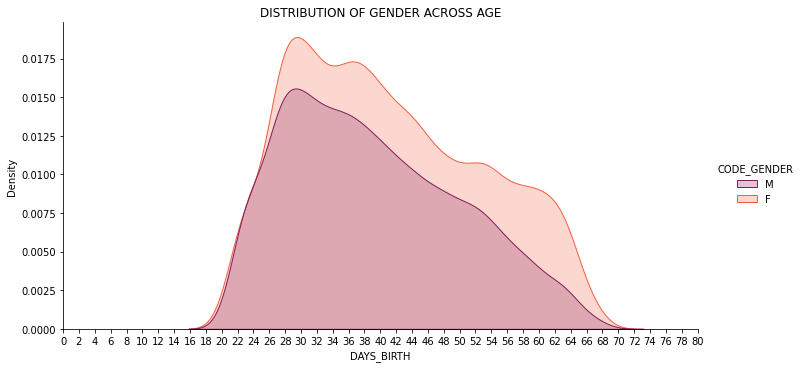

In [46]:
# DISTRIBUTION OF GENDER IN CONTRACT TYPE
# fig, ax = plt.subplots()
ax = sns.displot(data=df_default, x='DAYS_BIRTH', hue='CODE_GENDER', kind='kde',height=5,aspect=2,palette='rocket',fill=True);
plt.xticks(np.arange(0, 82, 2));
plt.title('DISTRIBUTION OF GENDER ACROSS AGE')


In [47]:
# STATISTICAL ANALYSIS
print(df_default.groupby(['CODE_GENDER']).AGE_YEARS.value_counts(normalize=True).mul(100))
df_default.groupby(['AGE_YEARS']).CODE_GENDER.value_counts(normalize=True).mul(100)

CODE_GENDER  AGE_YEARS
F            (25, 30]     15.850388
             (30, 35]     15.052929
             (35, 40]     15.052929
             (40, 45]     12.462950
             (45, 50]      9.901200
             (50, 55]      9.287227
             (55, 60]      8.193366
             (20, 25]      6.788991
             (60, 65]      6.591390
             (65, 70]      0.818631
M            (25, 30]     17.428437
             (30, 35]     16.902863
             (35, 40]     15.504458
             (40, 45]     12.595026
             (45, 50]     10.389489
             (20, 25]      8.953543
             (50, 55]      8.765838
             (55, 60]      5.753168
             (60, 65]      3.209761
             (65, 70]      0.497419
Name: AGE_YEARS, dtype: float64


AGE_YEARS  CODE_GENDER
(20, 25]   F              50.208768
           M              49.791232
(25, 30]   F              54.740434
           M              45.259566
(30, 35]   F              54.219624
           M              45.780376
(35, 40]   F              56.354029
           M              43.645971
(40, 45]   F              56.821107
           M              43.178893
(45, 50]   F              55.896414
           M              44.103586
(50, 55]   F              58.488889
           M              41.511111
(55, 60]   F              65.445321
           M              34.554679
(60, 65]   F              73.197492
           M              26.802508
(65, 70]   F              68.639053
           M              31.360947
Name: CODE_GENDER, dtype: float64

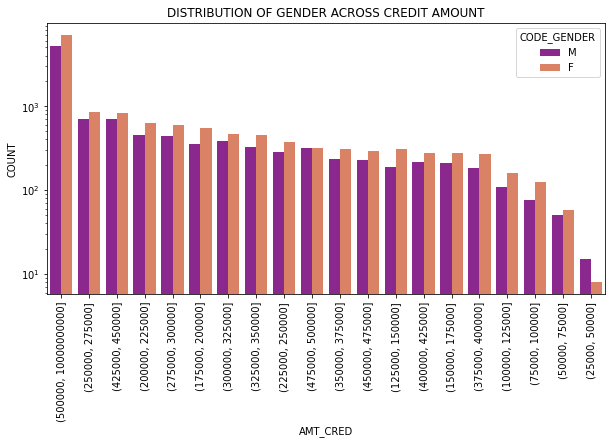

In [48]:
# DISTRIBUTION OF GENDER BY AMT_CRED
fig, axes = plt.subplots()
fig.set_size_inches(10,5)
bar_chart = sns.countplot(x='AMT_CRED', hue='CODE_GENDER', data=df_default, palette='plasma',
                         order = df_default['AMT_CRED'].value_counts().index);
plt.yscale('log')
plt.ylabel('COUNT')
plt.title('DISTRIBUTION OF GENDER ACROSS CREDIT AMOUNT')
plt.xticks(rotation=90);

In [49]:
# STATISTICAL ANALYSIS
print(df_default.groupby(['CODE_GENDER']).AMT_CRED.value_counts(normalize=True).mul(100))
df_default.groupby(['AMT_CRED']).CODE_GENDER.value_counts(normalize=True).mul(100)

CODE_GENDER  AMT_CRED             
F            (500000, 10000000000]    49.625970
             (250000, 275000]          6.033874
             (425000, 450000]          5.829217
             (200000, 225000]          4.389555
             (275000, 300000]          4.220183
             (175000, 200000]          3.909668
             (300000, 325000]          3.267466
             (325000, 350000]          3.225124
             (225000, 250000]          2.625265
             (475000, 500000]          2.223006
             (350000, 375000]          2.173606
             (125000, 150000]          2.166549
             (450000, 475000]          2.060692
             (400000, 425000]          1.954834
             (150000, 175000]          1.933663
             (375000, 400000]          1.891320
             (100000, 125000]          1.122089
             (75000, 100000]           0.882145
             (50000, 75000]            0.409315
             (25000, 50000]            0.056457
M    

AMT_CRED               CODE_GENDER
(100000, 125000]       F              59.550562
                       M              40.449438
(125000, 150000]       F              62.020202
                       M              37.979798
(150000, 175000]       F              56.378601
                       M              43.621399
(175000, 200000]       F              60.812294
                       M              39.187706
(200000, 225000]       F              57.806691
                       M              42.193309
(225000, 250000]       F              56.880734
                       M              43.119266
(25000, 50000]         M              65.217391
                       F              34.782609
(250000, 275000]       F              54.948586
                       M              45.051414
(275000, 300000]       F              57.777778
                       M              42.222222
(300000, 325000]       F              54.792899
                       M              45.207101
(3250

<div style="color:black;
           display:fill;
           border-radius:0.5px;
           background-color:papayawhip;
           font-size:20px;
           font-weight:600;
           font-family:Garamond;
           letter-spacing:0.05px">

<p style="padding:px;
              color:black;">
<h4>INSIGHTS:</h4>
<ul>
<li>56.53 % Cash loans and 65.02% of revolving loans were taken by females. </li><br>
<li>Credit amount taken by females were more in any given range.</li><br>
<li>Most females belonged to 30-40 age group and most males belonged to 25-35 age group. Female count was more even in higher age groups compared to that of males.</li><br>    
</ul>
   
</p>
</div> 

# INCOME TYPE ANALYSIS

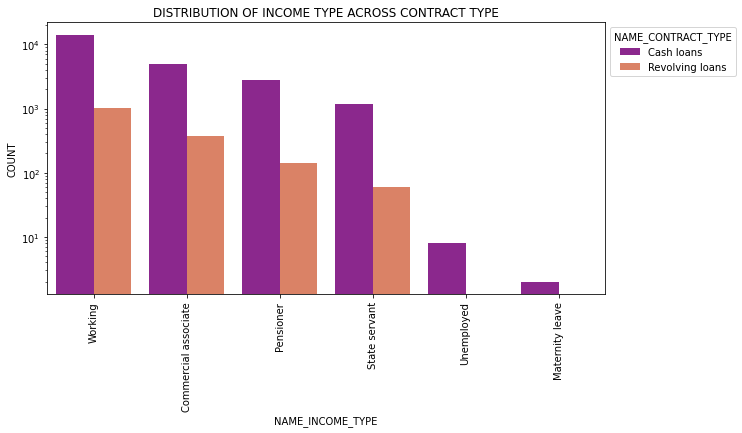

In [50]:
# DISTRIBUTION OF INCOME TYPE IN CONTRACT TYPE

fig, axes = plt.subplots()
fig.set_size_inches(10,5)
bar_chart = sns.countplot(x='NAME_INCOME_TYPE', hue='NAME_CONTRACT_TYPE', data=df_default, palette='plasma',
                         order = df_default['NAME_INCOME_TYPE'].value_counts().index)
bar_chart.legend(bbox_to_anchor=(1, 1), loc='upper left',title = 'NAME_CONTRACT_TYPE')
plt.yscale('log')
plt.title('DISTRIBUTION OF INCOME TYPE ACROSS CONTRACT TYPE')
plt.ylabel('COUNT')
plt.xticks(rotation=90);

In [51]:
# STATISTICAL ANALYSIS
print(df_default.groupby(['NAME_INCOME_TYPE']).NAME_CONTRACT_TYPE.value_counts(normalize=True).mul(100))
df_default.groupby(['NAME_CONTRACT_TYPE']).NAME_INCOME_TYPE.value_counts(normalize=True).mul(100)

NAME_INCOME_TYPE      NAME_CONTRACT_TYPE
Commercial associate  Cash loans             93.097015
                      Revolving loans         6.902985
Maternity leave       Cash loans            100.000000
Pensioner             Cash loans             95.305164
                      Revolving loans         4.694836
State servant         Cash loans             95.116093
                      Revolving loans         4.883907
Unemployed            Cash loans            100.000000
Working               Cash loans             93.214661
                      Revolving loans         6.785339
Name: NAME_CONTRACT_TYPE, dtype: float64


NAME_CONTRACT_TYPE  NAME_INCOME_TYPE    
Cash loans          Working                 61.112786
                    Commercial associate    21.489169
                    Pensioner               12.238922
                    State servant            5.116059
                    Unemployed               0.034452
                    Maternity leave          0.008613
Revolving loans     Working                 64.401496
                    Commercial associate    23.067332
                    Pensioner                8.728180
                    State servant            3.802993
Name: NAME_INCOME_TYPE, dtype: float64

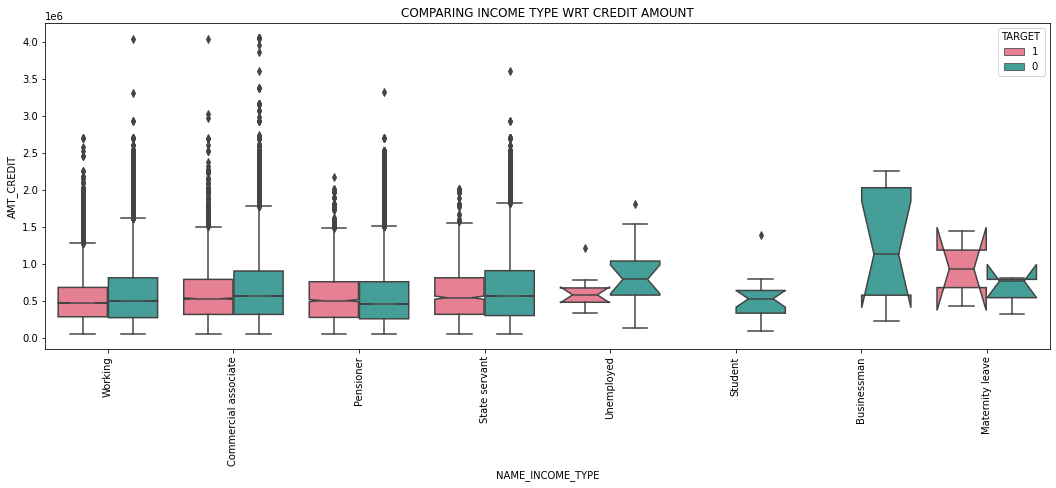

In [52]:
# DISTRIBUTION OF INCOME TYPE IN CREDIT AMOUNT
plt.figure(figsize=(18,6))
plt.xticks(rotation=90)
plt.title('COMPARING INCOME TYPE WRT CREDIT AMOUNT')
sns.boxplot(data=df_application,y= 'AMT_CREDIT', x='NAME_INCOME_TYPE', hue='TARGET', palette='husl',notch=True,
            order=df_application['NAME_INCOME_TYPE'].value_counts().index);

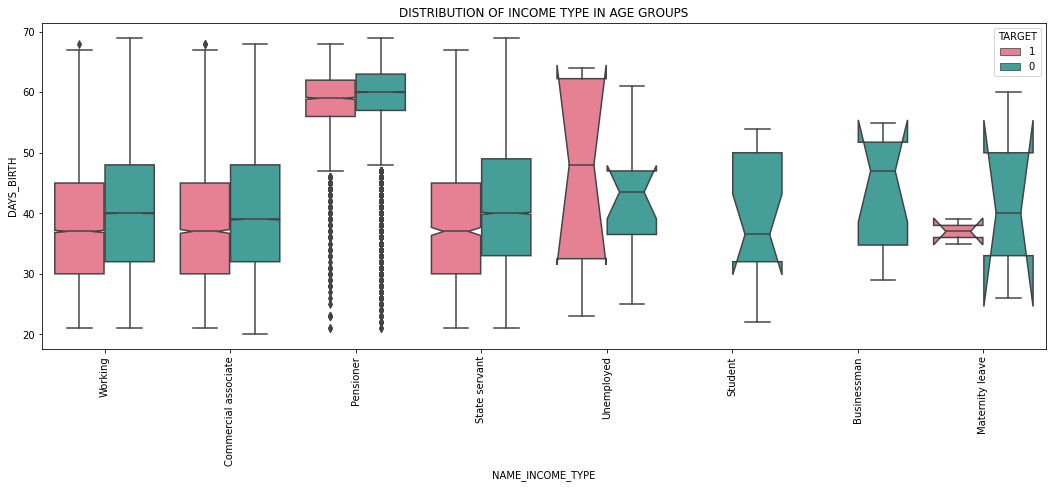

In [53]:
# DISTRIBUTION OF INCOME TYPE IN DIFFERENT AGE GROUPS
plt.figure(figsize=(18,6))
plt.xticks(rotation=90)
plt.title('DISTRIBUTION OF INCOME TYPE IN AGE GROUPS')
sns.boxplot(data=df_application,y= 'DAYS_BIRTH', x='NAME_INCOME_TYPE', hue='TARGET', palette='husl',notch=True,
           order=df_application['NAME_INCOME_TYPE'].value_counts().index);

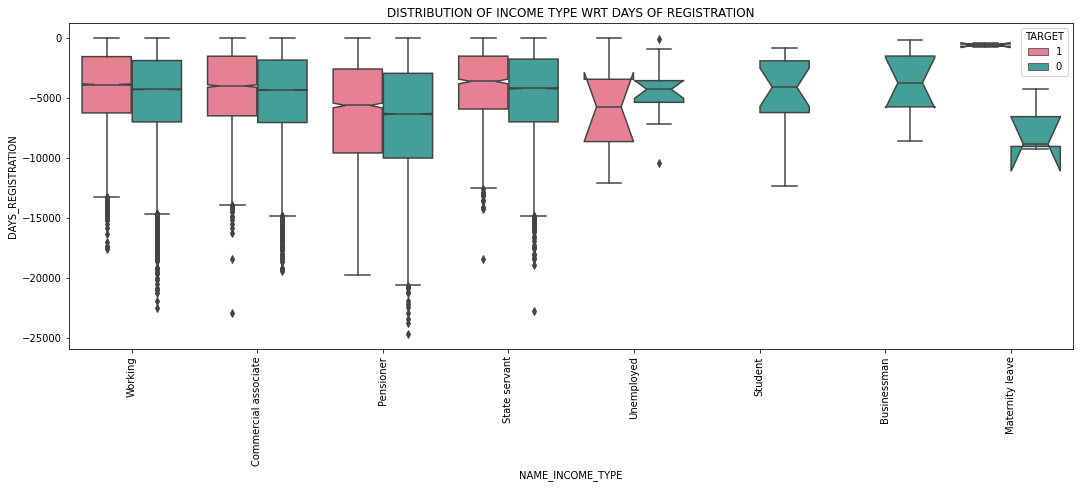

In [54]:
# DISTRIBUTION OF INCOME TYPE WRT DAYS OF REGISTRATION
plt.figure(figsize=(18,6))
plt.xticks(rotation=90)
plt.title('DISTRIBUTION OF INCOME TYPE WRT DAYS OF REGISTRATION')

sns.boxplot(data=df_application,y= 'DAYS_REGISTRATION', x='NAME_INCOME_TYPE', hue='TARGET', palette='husl',notch=True,
           order=df_application['NAME_INCOME_TYPE'].value_counts().index);

<div style="color:black;
           display:fill;
           border-radius:0.5px;
           background-color:papayawhip;
           font-size:20px;
           font-weight:600;
           font-family:Garamond;
           letter-spacing:0.05px">

<p style="padding:px;
              color:black;">
<h4>INSIGHTS:</h4>
<ul>
<li>Most of them took cash loans but the ones with maternity leave who took cash loans and belonged to age group 35-40 definitely defaulted.</li><br>
<li>Unemployed who took cash loans defaulted more  and no defaulters are observed in revolving loans.</li><br>
<li>The defaulters with higher credit amount with maternity leave as income type were more.</li><br>
<li>The clients with less time between the application and change of registration defaulted more.</li><br>
    
</ul>
 
</p>
</div>

# EDUCATION TYPE ANALYSIS

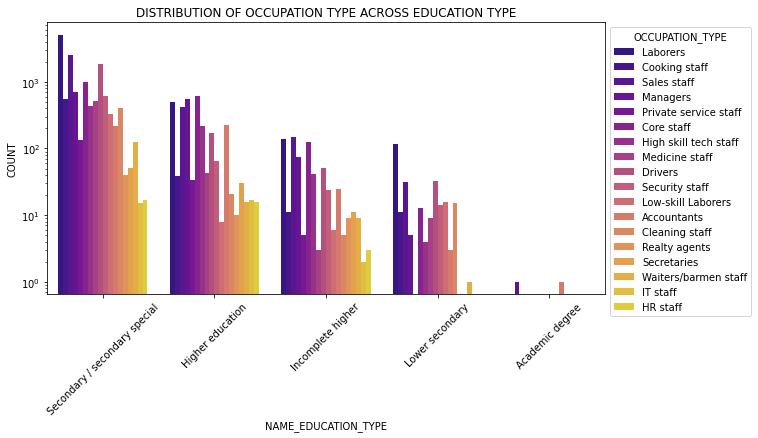

In [55]:
# DISTRIBUTION OF OCCUPATION TYPE IN EDUCATION TYPE
fig, axes = plt.subplots()
fig.set_size_inches(10,5)
b_e=sns.countplot(x='NAME_EDUCATION_TYPE', hue='OCCUPATION_TYPE', data=df_default, palette='plasma',
                         order = df_default['NAME_EDUCATION_TYPE'].value_counts().index)
b_e.legend(bbox_to_anchor=(1, 1), loc='upper left',title = 'OCCUPATION_TYPE')
plt.ylabel('COUNT')
plt.title('DISTRIBUTION OF OCCUPATION TYPE ACROSS EDUCATION TYPE')
plt.yscale('log')
plt.xticks(rotation=45,ha='center');

In [56]:
# STATISTICAL ANALYSIS
print(df_default.groupby(['NAME_EDUCATION_TYPE']).OCCUPATION_TYPE.value_counts(normalize=True).mul(100))
df_default.groupby(['OCCUPATION_TYPE']).NAME_EDUCATION_TYPE.value_counts(normalize=True).mul(100)

NAME_EDUCATION_TYPE            OCCUPATION_TYPE      
Academic degree                Accountants              50.000000
                               Sales staff              50.000000
Higher education               Core staff               20.280187
                               Managers                 18.445630
                               Laborers                 16.677785
                               Sales staff              14.076051
                               Accountants               7.505003
                               High skill tech staff     7.338225
                               Drivers                   5.703803
                               Security staff            2.201468
                               Medicine staff            1.434290
                               Cooking staff             1.267512
                               Private service staff     1.134089
                               Secretaries               1.000667
                       

OCCUPATION_TYPE        NAME_EDUCATION_TYPE          
Accountants            Higher education                 47.468354
                       Secondary / secondary special    46.413502
                       Incomplete higher                 5.274262
                       Lower secondary                   0.632911
                       Academic degree                   0.210970
Cleaning staff         Secondary / secondary special    90.827740
                       Higher education                  4.697987
                       Lower secondary                   3.355705
                       Incomplete higher                 1.118568
Cooking staff          Secondary / secondary special    90.338164
                       Higher education                  6.119163
                       Incomplete higher                 1.771337
                       Lower secondary                   1.771337
Core staff             Secondary / secondary special    57.192175
                       

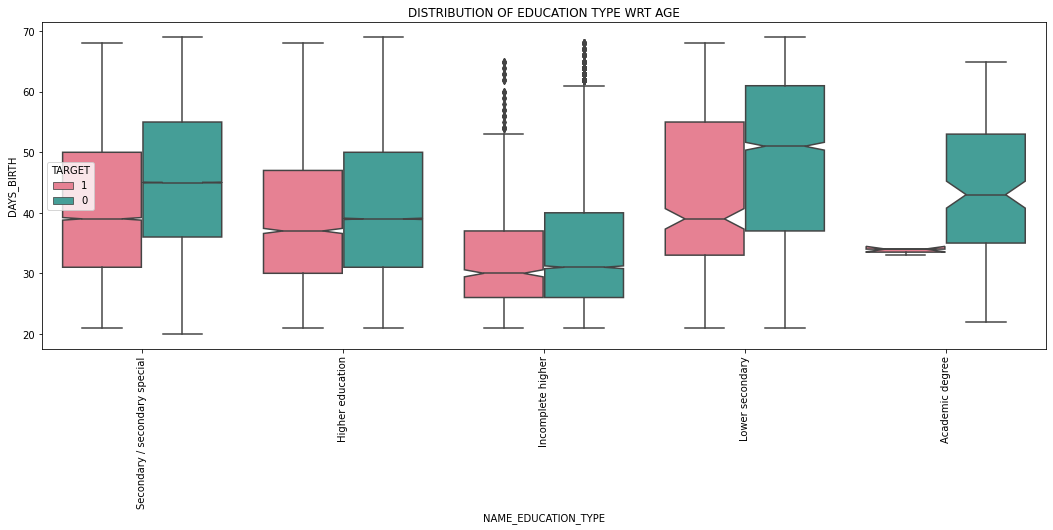

In [57]:
# DISTRIBUTION OF EDUCATION TYPE IN DIFFERENT AGE GROUPS
plt.figure(figsize=(18,6))
plt.xticks(rotation=90)
plt.title('DISTRIBUTION OF EDUCATION TYPE WRT AGE')

sns.boxplot(data=df_application,y= 'DAYS_BIRTH', x='NAME_EDUCATION_TYPE', hue='TARGET', palette='husl',notch=True,
           order=df_application['NAME_EDUCATION_TYPE'].value_counts().index);

In [58]:
# STATISTICAL ANALYSIS
print(df_default.groupby(['NAME_EDUCATION_TYPE']).AGE_YEARS.value_counts(normalize=True).mul(100))
df_default.groupby(['AGE_YEARS']).NAME_EDUCATION_TYPE.value_counts(normalize=True).mul(100)

NAME_EDUCATION_TYPE            AGE_YEARS
Academic degree                (30, 35]     100.000000
Higher education               (25, 30]      21.152407
                               (30, 35]      17.560489
                               (35, 40]      14.043402
                               (40, 45]      12.072836
                               (45, 50]       9.653280
                               (50, 55]       8.331255
                               (20, 25]       6.684959
                               (55, 60]       5.762035
                               (60, 65]       4.165627
                               (65, 70]       0.573709
Incomplete higher              (25, 30]      31.536697
                               (20, 25]      22.935780
                               (30, 35]      17.201835
                               (35, 40]      10.894495
                               (40, 45]       6.995413
                               (45, 50]       4.701835
                        

AGE_YEARS  NAME_EDUCATION_TYPE          
(20, 25]   Secondary / secondary special    74.321503
           Higher education                 13.987474
           Incomplete higher                10.438413
           Lower secondary                   1.252610
(25, 30]   Secondary / secondary special    71.508652
           Higher education                 20.667804
           Incomplete higher                 6.702413
           Lower secondary                   1.121131
(30, 35]   Secondary / secondary special    76.283681
           Higher education                 17.895272
           Incomplete higher                 3.812913
           Lower secondary                   1.931876
           Academic degree                   0.076258
(35, 40]   Secondary / secondary special    80.475561
           Higher education                 14.874505
           Incomplete higher                 2.509908
           Lower secondary                   2.140026
(40, 45]   Secondary / secondary special 

<div style="color:black;
           display:fill;
           border-radius:0.5px;
           background-color:papayawhip;
           font-size:20px;
           font-weight:600;
           font-family:Garamond;
           letter-spacing:0.05px">

<p style="padding:px;
              color:black;">
<h4>INSIGHTS:</h4>
<ul>
<li>The highest defaulters belonged to secondary/secondary special education type and lowest belonged to ones with academic degree.</li><br>
<li>In lower secondary education the IT staff, Private service staff, Realty agents and secretaries did not default.</li><br>
<li>The only defaulters from academic degree belonged to accountants and sales staff. Their age group can also be narrowed down to approximately 34-35 age.</li><br>    
</ul>
</p>
</div>

# SUITE TYPE

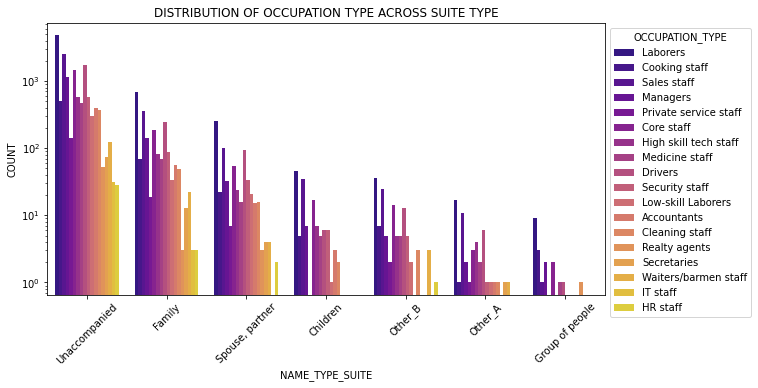

In [59]:
# DISTRIBUTION OF OCCUPATION TYPE IN SUITE TYPE
fig, axes = plt.subplots()
fig.set_size_inches(10,5)
b_e=sns.countplot(x='NAME_TYPE_SUITE', hue='OCCUPATION_TYPE', data=df_default, palette='plasma',
                         order = df_default['NAME_TYPE_SUITE'].value_counts().index)
b_e.legend(bbox_to_anchor=(1, 1), loc='upper left',title = 'OCCUPATION_TYPE')
plt.ylabel('COUNT')
plt.title('DISTRIBUTION OF OCCUPATION TYPE ACROSS SUITE TYPE')
plt.yscale('log')
plt.xticks(rotation=45,ha='center');

In [60]:
# STATISTICAL ANALYSIS
print(df_default.groupby(['NAME_TYPE_SUITE']).OCCUPATION_TYPE.value_counts(normalize=True).mul(100))
df_default.groupby(['OCCUPATION_TYPE']).NAME_TYPE_SUITE.value_counts(normalize=True).mul(100)

NAME_TYPE_SUITE  OCCUPATION_TYPE      
Children         Laborers                 32.374101
                 Sales staff              25.179856
                 Core staff               12.230216
                 High skill tech staff     5.035971
                 Managers                  5.035971
                 Drivers                   4.316547
                 Security staff            4.316547
                 Cooking staff             3.597122
                 Medicine staff            3.597122
                 Accountants               2.158273
                 Cleaning staff            1.438849
                 Low-skill Laborers        0.719424
Family           Laborers                 31.907895
                 Sales staff              17.058271
                 Drivers                  11.701128
                 Core staff                8.787594
                 Managers                  6.578947
                 Security staff            4.182331
                 High ski

OCCUPATION_TYPE        NAME_TYPE_SUITE
Accountants            Unaccompanied      83.966245
                       Family             12.025316
                       Spouse, partner     3.164557
                       Children            0.632911
                       Other_A             0.210970
Cleaning staff         Unaccompanied      84.116331
                       Family             10.961969
                       Spouse, partner     3.579418
                       Other_B             0.671141
                       Children            0.447427
                       Other_A             0.223714
Cooking staff          Unaccompanied      82.580645
                       Family             11.290323
                       Spouse, partner     3.548387
                       Other_B             1.129032
                       Children            0.806452
                       Group of people     0.483871
                       Other_A             0.161290
Core staff             Un

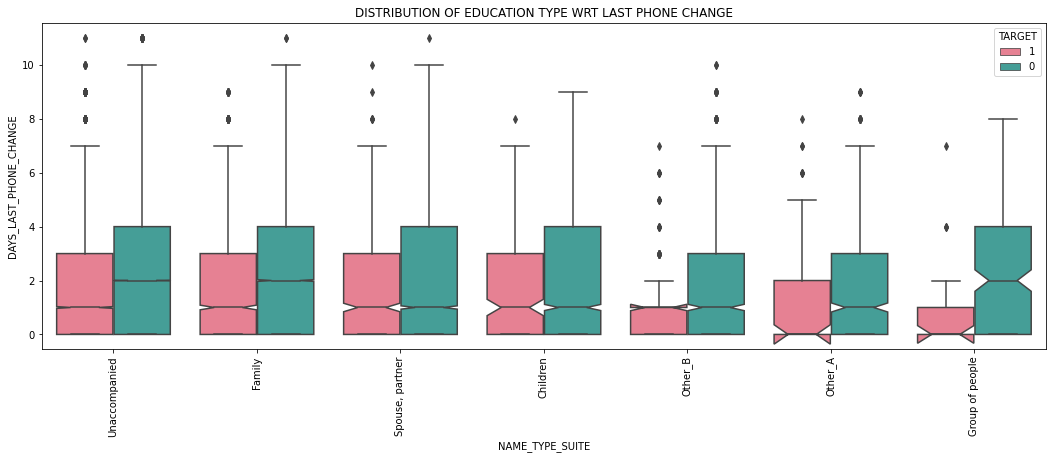

In [61]:
# DISTRIBUTION OF EDUCATION TYPE IN DIFFERENT AGE GROUPS
plt.figure(figsize=(18,6))
plt.xticks(rotation=90)
plt.title('DISTRIBUTION OF EDUCATION TYPE WRT LAST PHONE CHANGE')

sns.boxplot(data=df_application,y= 'DAYS_LAST_PHONE_CHANGE', x='NAME_TYPE_SUITE', hue='TARGET', palette='husl',notch=True,
           order=df_application['NAME_TYPE_SUITE'].value_counts().index);

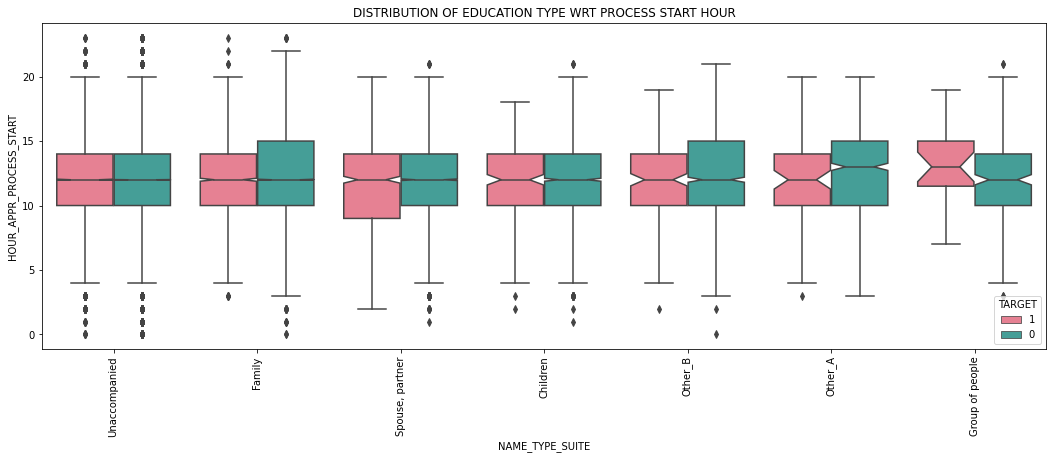

In [62]:
# DISTRIBUTION OF EDUCATION TYPE WRT PROCESS START HOUR
plt.figure(figsize=(18,6))
plt.xticks(rotation=90)
plt.title('DISTRIBUTION OF EDUCATION TYPE WRT PROCESS START HOUR')

sns.boxplot(data=df_application,y= 'HOUR_APPR_PROCESS_START', x='NAME_TYPE_SUITE', hue='TARGET', palette='husl',notch=True,
           order=df_application['NAME_TYPE_SUITE'].value_counts().index);

<div style="color:black;
           display:fill;
           border-radius:0.5px;
           background-color:papayawhip;
           font-size:20px;
           font-weight:600;
           font-family:Garamond;
           letter-spacing:0.05px">

<p style="padding:px;
              color:black;">
<h4>INSIGHTS:</h4> 
<ul>
<li>In defaulters people with suite type as spouse/partner, never had IT staff as occupation.</li><br>
<li>Suite type Children never had occupation type as Private service staff, Realty agents, secretaries, Waiters/barmen staff, IT staff or HR-staff.<br>
<li>With suite type Other_B , no defaulters  were from Accountants, Realty agents, Secretaries, IT staff occupation.<br>   <li>Realty agents with suite type Group of people always defaulted. Suite type Group of people were never  from occupation IT staff, High skill tech staff, Accountants, Waiters/barmen staff, IT staff or HR-staff.<br>   
<li>It is also observed that defaulters with suite type Other_B, Other_A and Group of People had their last phone changed near to application date.<br>   
<li>Most of the defaulters with suite type group of people had applied for loan at 12 hrs.</li><br>    
</ul>

</p>
</div>

# COMPARING THE AMOUNT OF GOODS AND CREDIT TAKEN IN THE AMOUNT RANGE

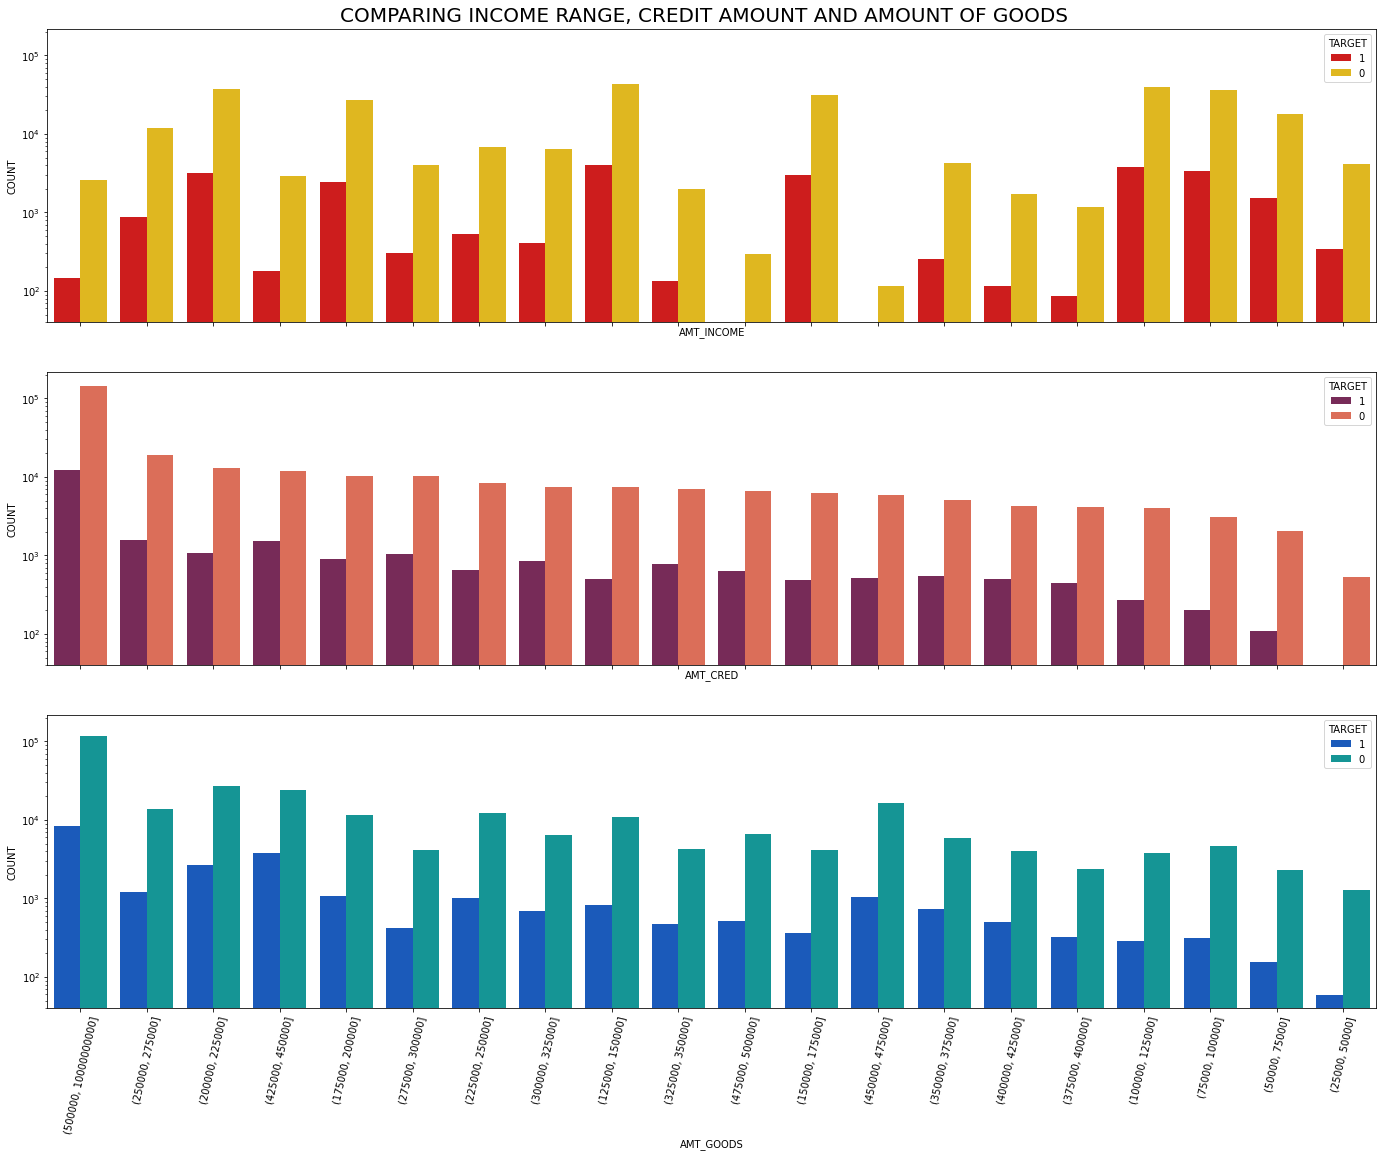

In [63]:
# 
fig, ax = plt.subplots(3,1,sharex=True, sharey=True)

fig.set_size_inches(20, 15)
fig.tight_layout(pad=4)
fig.suptitle('COMPARING INCOME RANGE, CREDIT AMOUNT AND AMOUNT OF GOODS', fontsize=20)
plt.xticks(rotation=77, ha='center')
plt.ylabel('COUNT')

ax[0]=sns.countplot(data = df_application, x= 'AMT_INCOME', order=df_application['AMT_CRED'].value_counts().index,hue = 'TARGET',palette='hot',ax=ax[0])
ax[1]=sns.countplot(data = df_application, x= 'AMT_CRED', order=df_application['AMT_CRED'].value_counts().index,
              hue = 'TARGET',palette='rocket', ax=ax[1])
ax[2]=sns.countplot(data = df_application, x= 'AMT_GOODS', order=df_application['AMT_CRED'].value_counts().index,
              hue = 'TARGET',palette='winter', ax=ax[2])
ax[0].set(ylabel="COUNT")
ax[1].set(ylabel="COUNT")
ax[2].set(ylabel="COUNT")
plt.yscale('log')

In [64]:
print(df_default.groupby(['TARGET'])['AMT_INCOME'].value_counts(normalize=True).mul(100))
print(df_default.groupby(['TARGET'])['AMT_CRED'].value_counts(normalize=True).mul(100))
print(df_default.groupby(['TARGET'])['AMT_GOODS'].value_counts(normalize=True).mul(100))

TARGET  AMT_INCOME           
1       (125000, 150000]         16.326284
        (100000, 125000]         15.472306
        (75000, 100000]          13.518630
        (200000, 225000]         12.898288
        (150000, 175000]         11.995972
        (175000, 200000]          9.885196
        (50000, 75000]            6.147029
        (250000, 275000]          3.573011
        (225000, 250000]          2.118832
        (300000, 325000]          1.651561
        (25000, 50000]            1.381672
        (275000, 300000]          1.232628
        (350000, 375000]          1.027190
        (425000, 450000]          0.725076
        (500000, 10000000000]     0.588117
        (325000, 350000]          0.543807
        (400000, 425000]          0.463243
        (375000, 400000]          0.342397
        (475000, 500000]          0.064451
        (450000, 475000]          0.044310
Name: AMT_INCOME, dtype: float64
TARGET  AMT_CRED             
1       (500000, 10000000000]    49.224572
    

<div style="color:black;
           display:fill;
           border-radius:0.5px;
           background-color:papayawhip;
           font-size:20px;
           font-weight:600;
           font-family:Garamond;
           letter-spacing:0.05px">

<p style="padding:px;
              color:black;">
<h4>INSIGHTS:</h4>
<ul>
<li>We can see that almost 33.58% of defaulters had applied for loan with goods amount in range of (500000, 10000000000) , but 49.22% had taken credit amount in same range.</li><br>
<li>That means credit amount was more than goods price in 15.64% of cases.</li><br>
<li>This parity can be observed in other price range as well</li><br>    
</ul>
</p>
</div>

# ANALYZING PREVIOUS DATASET

# CONTRACT TYPE ANALYSIS

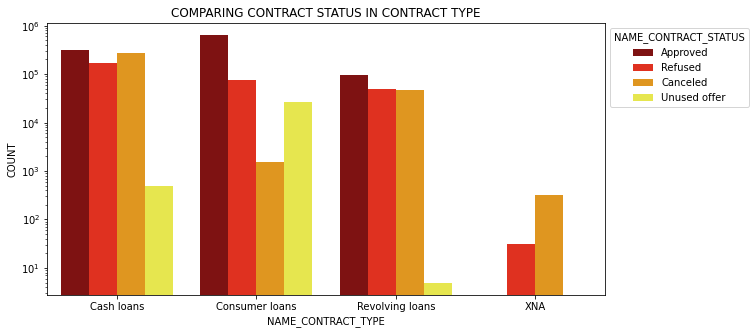

In [65]:
# DESCRIBING CONTRACT TYPE UNDER CONTRACT STATUS
fig, axes = plt.subplots()
fig.set_size_inches(10,5)
c_prev =sns.countplot(x='NAME_CONTRACT_TYPE', hue='NAME_CONTRACT_STATUS', data=df_prev_app, palette='hot',
                  order = df_prev_app['NAME_CONTRACT_TYPE'].value_counts().index)
c_prev.legend(bbox_to_anchor=(1, 1), loc='upper left',title = 'NAME_CONTRACT_STATUS')
plt.title('COMPARING CONTRACT STATUS IN CONTRACT TYPE')
plt.ylabel('COUNT')
plt.yscale('log')

In [66]:
print(df_prev_app.groupby(['NAME_CONTRACT_TYPE']).NAME_CONTRACT_STATUS.value_counts(normalize=True).mul(100))
df_prev_app.groupby(['NAME_CONTRACT_STATUS']).NAME_CONTRACT_TYPE.value_counts(normalize=True).mul(100)

NAME_CONTRACT_TYPE  NAME_CONTRACT_STATUS
Cash loans          Approved                41.808407
                    Canceled                35.929359
                    Refused                 22.196152
                    Unused offer             0.066082
Consumer loans      Approved                85.917732
                    Refused                 10.311307
                    Unused offer             3.557151
                    Canceled                 0.213810
Revolving loans     Approved                50.615539
                    Refused                 25.643495
                    Canceled                23.738378
                    Unused offer             0.002588
XNA                 Canceled                91.040462
                    Refused                  8.959538
Name: NAME_CONTRACT_STATUS, dtype: float64


NAME_CONTRACT_STATUS  NAME_CONTRACT_TYPE
Approved              Consumer loans        60.424526
                      Cash loans            30.145228
                      Revolving loans        9.430246
Canceled              Cash loans            84.911434
                      Revolving loans       14.496126
                      Consumer loans         0.492857
                      XNA                    0.099583
Refused               Cash loans            57.083095
                      Consumer loans        25.865391
                      Revolving loans       17.040849
                      XNA                    0.010665
Unused offer          Consumer loans        98.112422
                      Cash loans             1.868664
                      Revolving loans        0.018914
Name: NAME_CONTRACT_TYPE, dtype: float64

In [67]:
# STATISTICAL ANALYSIS
df_merge.groupby(['NAME_CONTRACT_TYPE_x']).TARGET.value_counts(normalize=True).mul(100)

NAME_CONTRACT_TYPE_x  TARGET
Cash loans            0         90.874237
                      1          9.125763
Consumer loans        0         92.290038
                      1          7.709962
Revolving loans       0         89.531382
                      1         10.468618
XNA                   0         79.872204
                      1         20.127796
Name: TARGET, dtype: float64

<div style="color:black;
           display:fill;
           border-radius:0.5px;
           background-color:papayawhip;
           font-size:20px;
           font-weight:600;
           font-family:Garamond;
           letter-spacing:0.05px">

<p style="padding:px;
              color:black;">
<h4>INSIGHTS:</h4> 
<ul>
<li>In contract type 85.92% of consumer loans were approved and XNA were never approved.</li><br>
   
</ul>    



</p>
</div>

# FLAG LAST APPL PER CONTRACT ANALYSIS

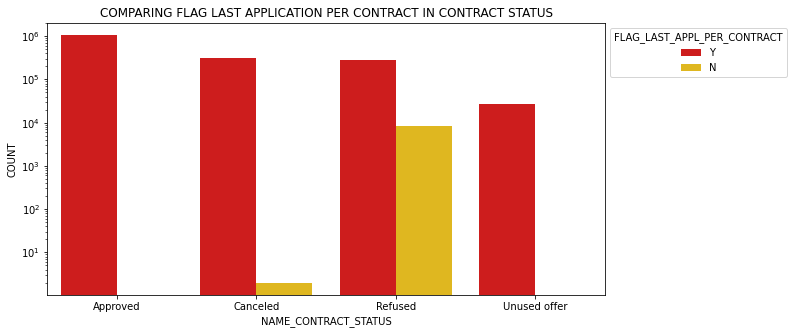

In [68]:
# DESCRIBING FLAG LAST APPL PER CONTRACT UNDER CONTRACT STATUS
fig, axes = plt.subplots()
fig.set_size_inches(10,5)
b_e=sns.countplot(x='NAME_CONTRACT_STATUS', hue='FLAG_LAST_APPL_PER_CONTRACT', data=df_prev_app, palette='hot',
                         order = df_prev_app['NAME_CONTRACT_STATUS'].value_counts().index)
b_e.legend(bbox_to_anchor=(1, 1), loc='upper left',title = 'FLAG_LAST_APPL_PER_CONTRACT')
plt.title('COMPARING FLAG LAST APPLICATION PER CONTRACT IN CONTRACT STATUS')
plt.ylabel('COUNT')
plt.yscale('log')

In [69]:
# STATISTICAL ANALYSIS
print(df_prev_app.groupby(['FLAG_LAST_APPL_PER_CONTRACT']).NAME_CONTRACT_STATUS.value_counts(normalize=True).mul(100))
df_prev_app.groupby(['NAME_CONTRACT_STATUS']).FLAG_LAST_APPL_PER_CONTRACT.value_counts(normalize=True).mul(100)

FLAG_LAST_APPL_PER_CONTRACT  NAME_CONTRACT_STATUS
N                            Refused                 99.976401
                             Canceled                 0.023599
Y                            Approved                62.391326
                             Canceled                19.035300
                             Refused                 16.982510
                             Unused offer             1.590864
Name: NAME_CONTRACT_STATUS, dtype: float64


NAME_CONTRACT_STATUS  FLAG_LAST_APPL_PER_CONTRACT
Approved              Y                              100.000000
Canceled              Y                               99.999368
                      N                                0.000632
Refused               Y                               97.085091
                      N                                2.914909
Unused offer          Y                              100.000000
Name: FLAG_LAST_APPL_PER_CONTRACT, dtype: float64

In [70]:
df_merge.groupby(['FLAG_LAST_APPL_PER_CONTRACT']).TARGET.value_counts(normalize=True).mul(100)

FLAG_LAST_APPL_PER_CONTRACT  TARGET
N                            0         89.185124
                             1         10.814876
Y                            0         91.355935
                             1          8.644065
Name: TARGET, dtype: float64

<div style="color:black;
           display:fill;
           border-radius:0.5px;
           background-color:papayawhip;
           font-size:20px;
           font-weight:600;
           font-family:Garamond;
           letter-spacing:0.05px">

<p style="padding:px;
              color:black;">
<h4>INSIGHTS:</h4>
<ul>
<li>All approved status with Flag last application contract were yes. The no were mostly refused.</li><br>
   
</ul>    

</p>
</div>

# PAYMENT TYPE ANALYSIS

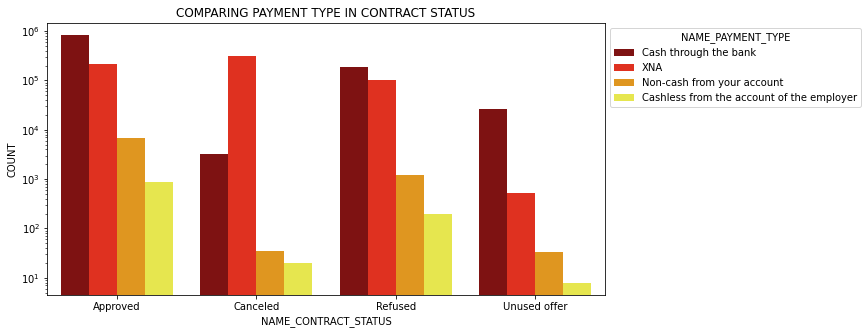

In [71]:
# DESCRIBING PAYMENT TYPE IN CONTRACT STATUS
fig, axes = plt.subplots()
fig.set_size_inches(10,5)
b_e=sns.countplot(x='NAME_CONTRACT_STATUS', hue='NAME_PAYMENT_TYPE', data=df_prev_app, palette='hot',
                         order = df_prev_app['NAME_CONTRACT_STATUS'].value_counts().index)
b_e.legend(bbox_to_anchor=(1, 1), loc='upper left',title = 'NAME_PAYMENT_TYPE')
plt.title('COMPARING PAYMENT TYPE IN CONTRACT STATUS')
plt.ylabel('COUNT')
plt.yscale('log')

In [72]:
# STATISTICAL ANALYSIS
print(df_prev_app.groupby(['NAME_CONTRACT_STATUS']).NAME_PAYMENT_TYPE.value_counts(normalize=True).mul(100))
df_prev_app.groupby(['NAME_PAYMENT_TYPE']).NAME_CONTRACT_STATUS.value_counts(normalize=True).mul(100)

NAME_CONTRACT_STATUS  NAME_PAYMENT_TYPE                        
Approved              Cash through the bank                        78.818381
                      XNA                                          20.429290
                      Non-cash from your account                    0.669187
                      Cashless from the account of the employer     0.083142
Canceled              XNA                                          98.974137
                      Cash through the bank                         1.008476
                      Non-cash from your account                    0.011065
                      Cashless from the account of the employer     0.006323
Refused               Cash through the bank                        64.437969
                      XNA                                          35.086591
                      Non-cash from your account                    0.408356
                      Cashless from the account of the employer     0.067085
Unused offer

NAME_PAYMENT_TYPE                          NAME_CONTRACT_STATUS
Cash through the bank                      Approved                79.064624
                                           Refused                 18.122649
                                           Unused offer             2.504083
                                           Canceled                 0.308644
Cashless from the account of the employer  Approved                79.447005
                                           Refused                 17.972350
                                           Canceled                 1.843318
                                           Unused offer             0.737327
Non-cash from your account                 Approved                84.682046
                                           Refused                 14.487978
                                           Canceled                 0.427194
                                           Unused offer             0.402783
XNA         

In [73]:
# STATISTICAL ANALYSIS 
df_merge.groupby(['NAME_PAYMENT_TYPE']).TARGET.value_counts(normalize=True).mul(100)

NAME_PAYMENT_TYPE                          TARGET
Cash through the bank                      0         91.913447
                                           1          8.086553
Cashless from the account of the employer  0         91.923486
                                           1          8.076514
Non-cash from your account                 0         91.788732
                                           1          8.211268
XNA                                        0         90.377658
                                           1          9.622342
Name: TARGET, dtype: float64

<div style="color:black;
           display:fill;
           border-radius:0.5px;
           background-color:papayawhip;
           font-size:20px;
           font-weight:600;
           font-family:Garamond;
           letter-spacing:0.05px">

<p style="padding:px;
              color:black;">
    
    
<h4>INSIGHTS:</h4>
<ul>
<li>78.82% of approved had payment type Cash through bank as most. 98.97% with cancelled status belonged to XNA payment type was less approved mostly cancelled or refused.</li><br>
   
</ul>    

</p>
</div>

# GOODS CATEGORY ANALYSIS

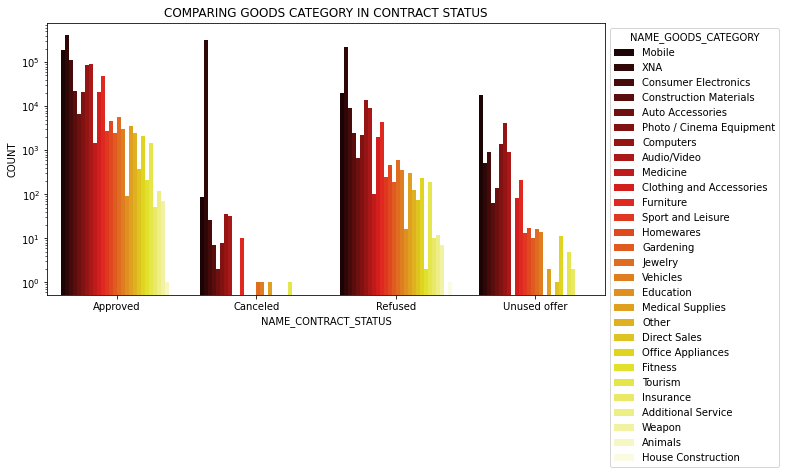

In [74]:
# DESCRIBING GOODS CATEGORY IN CONTRACT STATUS
fig, axes = plt.subplots()
fig.set_size_inches(10,5)
b_e=sns.countplot(x='NAME_CONTRACT_STATUS', hue='NAME_GOODS_CATEGORY', data=df_prev_app, palette='hot',
                         order = df_prev_app['NAME_CONTRACT_STATUS'].value_counts().index)
b_e.legend(bbox_to_anchor=(1, 1), loc='upper left',title = 'NAME_GOODS_CATEGORY')
plt.title('COMPARING GOODS CATEGORY IN CONTRACT STATUS')
plt.ylabel('COUNT')
plt.yscale('log')

In [75]:
# STATISTICAL ANALYSIS
print(df_prev_app.groupby(['NAME_CONTRACT_STATUS']).NAME_GOODS_CATEGORY.value_counts(normalize=True).mul(100))
df_prev_app.groupby(['NAME_GOODS_CATEGORY']).NAME_CONTRACT_STATUS.value_counts(normalize=True).mul(100)

NAME_CONTRACT_STATUS  NAME_GOODS_CATEGORY     
Approved              XNA                         39.585023
                      Mobile                      17.956926
                      Consumer Electronics        10.756852
                      Audio/Video                  8.622264
                      Computers                    8.492632
                      Furniture                    4.734848
                      Construction Materials       2.167382
                      Clothing and Accessories     2.069868
                      Photo / Cinema Equipment     2.062056
                      Auto Accessories             0.632728
                      Jewelry                      0.547753
                      Homewares                    0.437894
                      Medical Supplies             0.341345
                      Vehicles                     0.288393
                      Sport and Leisure            0.262158
                      Gardening                    0.

NAME_GOODS_CATEGORY       NAME_CONTRACT_STATUS
Additional Service        Approved                 90.625000
                          Refused                   9.375000
Animals                   Approved                100.000000
Audio/Video               Approved                 89.896522
                          Refused                   9.131043
                          Unused offer              0.940256
                          Canceled                  0.032180
Auto Accessories          Approved                 88.876846
                          Refused                   9.199295
                          Unused offer              1.896762
                          Canceled                  0.027097
Clothing and Accessories  Approved                 91.109790
                          Refused                   8.533582
                          Unused offer              0.356627
Computers                 Approved                 83.247454
                          Refused     

In [76]:
# STATISTICAL ANALYSIS
df_merge.groupby(['NAME_GOODS_CATEGORY']).TARGET.value_counts(normalize=True).mul(100)

NAME_GOODS_CATEGORY       TARGET
Additional Service        0          93.577982
                          1           6.422018
Animals                   0         100.000000
Audio/Video               0          92.338191
                          1           7.661809
Auto Accessories          0          90.928067
                          1           9.071933
Clothing and Accessories  0          94.298111
                          1           5.701889
Computers                 0          91.895288
                          1           8.104712
Construction Materials    0          93.032403
                          1           6.967597
Consumer Electronics      0          92.933149
                          1           7.066851
Direct Sales              0          91.818182
                          1           8.181818
Education                 0          94.382022
                          1           5.617978
Fitness                   0          95.783133
                          1

<div style="color:black;
           display:fill;
           border-radius:0.5px;
           background-color:papayawhip;
           font-size:20px;
           font-weight:600;
           font-family:Garamond;
           letter-spacing:0.05px">

<p style="padding:px;
              color:black;">
<h4>INSIGHTS:</h4>
<ul>
<li>Goods category Fitness, Other  and Medicine were among top approval rates. Only 81% in Insurance were approved. XNA category covered 99% in cancelled status and only 43% were approved.</li><br>
   
</ul>    
    

</p>
</div>

# PORTFOLIO ANALYSIS

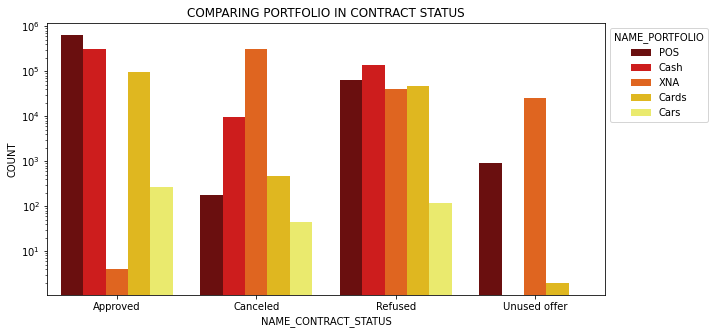

In [77]:
# DESCRIBING PORTFOLIO IN CONTRACT STATUS
fig, axes = plt.subplots()
fig.set_size_inches(10,5)
b_e=sns.countplot(x='NAME_CONTRACT_STATUS', hue='NAME_PORTFOLIO', data=df_prev_app, palette='hot',
                         order = df_prev_app['NAME_CONTRACT_STATUS'].value_counts().index)
b_e.legend(bbox_to_anchor=(1, 1), loc='upper left',title = 'NAME_PORTFOLIO')
plt.title('COMPARING PORTFOLIO IN CONTRACT STATUS')
plt.ylabel('COUNT')
plt.yscale('log')

In [78]:
# STATISTICAL ANALYSIS
print(df_prev_app.groupby(['NAME_CONTRACT_STATUS']).NAME_PORTFOLIO.value_counts(normalize=True).mul(100))
df_prev_app.groupby(['NAME_PORTFOLIO']).NAME_CONTRACT_STATUS.value_counts()

NAME_CONTRACT_STATUS  NAME_PORTFOLIO
Approved              POS               60.399159
                      Cash              30.144843
                      Cards              9.430246
                      Cars               0.025367
                      XNA                0.000386
Canceled              XNA               96.676140
                      Cash               3.105409
                      Cards              0.149533
                      POS                0.055008
                      Cars               0.013910
Refused               Cash              47.889417
                      POS               21.921164
                      Cards             16.079304
                      XNA               14.069520
                      Cars               0.040595
Unused offer          XNA               96.550159
                      POS                3.442276
                      Cards              0.007565
Name: NAME_PORTFOLIO, dtype: float64


NAME_PORTFOLIO  NAME_CONTRACT_STATUS
Cards           Approved                 97771
                Refused                  46739
                Canceled                   473
                Unused offer                 2
Cars            Approved                   263
                Refused                    118
                Canceled                    44
Cash            Approved                312536
                Refused                 139204
                Canceled                  9823
POS             Approved                626207
                Refused                  63720
                Unused offer               910
                Canceled                   174
XNA             Canceled                305805
                Refused                  40897
                Unused offer             25524
                Approved                     4
Name: NAME_CONTRACT_STATUS, dtype: int64

In [79]:
# STATISTICAL ANALYSIS
df_merge.groupby(['NAME_PORTFOLIO']).TARGET.value_counts(normalize=True).mul(100)

NAME_PORTFOLIO  TARGET
Cards           0         89.838095
                1         10.161905
Cars            0         94.473684
                1          5.526316
Cash            0         91.123491
                1          8.876509
POS             0         92.364041
                1          7.635959
XNA             0         90.255295
                1          9.744705
Name: TARGET, dtype: float64

<div style="color:black;
           display:fill;
           border-radius:0.5px;
           background-color:papayawhip;
           font-size:20px;
           font-weight:600;
           font-family:Garamond;
           letter-spacing:0.05px">

<p style="padding:px;
              color:black;">
<h4>INSIGHTS:</h4>
<ul>
<li>Portfolio POS was most approved and least approved were XNA. Most refused were cash portfolio.</li><br>   
</ul>    
</p>
</div>

# YIELD GROUP ANALYSIS

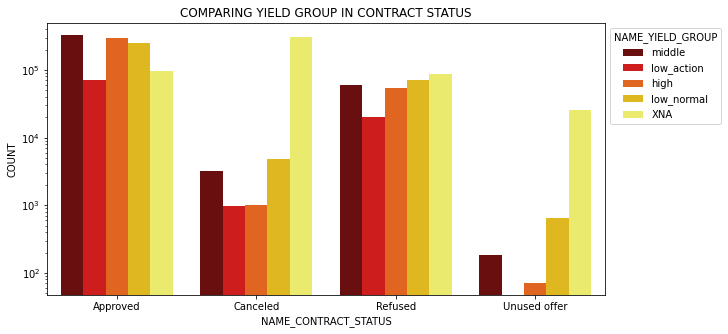

In [80]:
# DESCRIBING YIELD GROUP IN CONTRACT STATUS
fig, axes = plt.subplots()
fig.set_size_inches(10,5)
b_e=sns.countplot(x='NAME_CONTRACT_STATUS', hue='NAME_YIELD_GROUP', data=df_prev_app, palette='hot',
                         order = df_prev_app['NAME_CONTRACT_STATUS'].value_counts().index)
b_e.legend(bbox_to_anchor=(1, 1), loc='upper left',title = 'NAME_YIELD_GROUP')
plt.title('COMPARING YIELD GROUP IN CONTRACT STATUS')
plt.ylabel('COUNT')
plt.yscale('log')

In [81]:
# STATISTICAL ANALYSIS
print(df_prev_app.groupby(['NAME_CONTRACT_STATUS']).NAME_YIELD_GROUP.value_counts(normalize=True).mul(100))
df_prev_app.groupby(['NAME_YIELD_GROUP']).NAME_CONTRACT_STATUS.value_counts(normalize=True).mul(100)

NAME_CONTRACT_STATUS  NAME_YIELD_GROUP
Approved              middle              31.157593
                      high                28.840999
                      low_normal          23.734617
                      XNA                  9.430632
                      low_action           6.836159
Canceled              XNA                 96.825673
                      low_normal           1.526307
                      middle               1.028708
                      high                 0.315504
                      low_action           0.303807
Refused               XNA                 30.148824
                      low_normal          24.266714
                      middle              20.316983
                      high                18.316832
                      low_action           6.950646
Unused offer          XNA                 96.557724
                      low_normal           2.470117
                      middle               0.699803
                      hig

NAME_YIELD_GROUP  NAME_CONTRACT_STATUS
XNA               Canceled                59.216767
                  Approved                18.904131
                  Refused                 16.943824
                  Unused offer             4.935278
high              Approved                84.628295
                  Refused                 15.068873
                  Canceled                 0.282455
                  Unused offer             0.020377
low_action        Approved                77.004813
                  Refused                 21.951087
                  Canceled                 1.044100
low_normal        Approved                76.398578
                  Refused                 21.899750
                  Canceled                 1.498937
                  Unused offer             0.202735
middle            Approved                83.789672
                  Refused                 15.318313
                  Canceled                 0.844029
                  Unused 

In [82]:
# STATISTICAL ANALYSIS
df_merge.groupby(['NAME_YIELD_GROUP']).TARGET.value_counts(normalize=True).mul(100)

NAME_YIELD_GROUP  TARGET
XNA               0         90.136720
                  1          9.863280
high              0         90.454844
                  1          9.545156
low_action        0         93.548551
                  1          6.451449
low_normal        0         92.867901
                  1          7.132099
middle            0         91.956821
                  1          8.043179
Name: TARGET, dtype: float64

<div style="color:black;
           display:fill;
           border-radius:0.5px;
           background-color:papayawhip;
           font-size:20px;
           font-weight:600;
           font-family:Garamond;
           letter-spacing:0.05px">

<p style="padding:px;
              color:black;">
<h4>INSIGHTS:</h4>
<ul>
<li>59.22% Yield type XNA had cancelled. 31.16% of approved were from middle yield followed by 28.84% from high yield.</li><br>   
</ul>     
</p>
</div>

# PRODUCT COMBINATION ANALYSIS

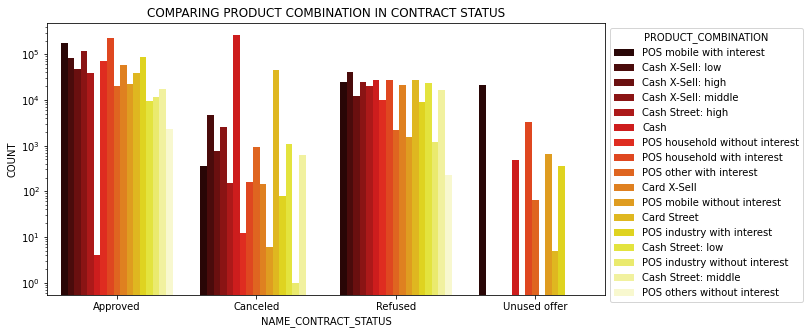

In [83]:
# DESCRIBING PRODUCT COMBINATION IN CONTRACT STATUS
fig, axes = plt.subplots()
fig.set_size_inches(10,5)
b_e=sns.countplot(x='NAME_CONTRACT_STATUS', hue='PRODUCT_COMBINATION', data=df_prev_app, palette='hot',
                         order = df_prev_app['NAME_CONTRACT_STATUS'].value_counts().index)
b_e.legend(bbox_to_anchor=(1, 1), loc='upper left',title = 'PRODUCT_COMBINATION')
plt.title('COMPARING PRODUCT COMBINATION IN CONTRACT STATUS')
plt.ylabel('COUNT')
plt.yscale('log')

In [84]:
# STATISTICAL ANALYSIS
print(df_prev_app.groupby(['NAME_CONTRACT_STATUS']).PRODUCT_COMBINATION.value_counts(normalize=True).mul(100))
df_prev_app.groupby(['PRODUCT_COMBINATION']).NAME_CONTRACT_STATUS.value_counts(normalize=True).mul(100)

NAME_CONTRACT_STATUS  PRODUCT_COMBINATION           
Approved              POS household with interest       22.503306
                      POS mobile with interest          16.826215
                      Cash X-Sell: middle               11.213747
                      POS industry with interest         8.629788
                      Cash X-Sell: low                   8.075862
                      POS household without interest     7.034176
                      Card X-Sell                        5.685193
                      Cash X-Sell: high                  4.486868
                      Cash Street: high                  3.752191
                      Card Street                        3.745053
                      POS mobile without interest        2.112404
                      POS other with interest            1.991645
                      Cash Street: middle                1.697658
                      POS industry without interest      1.102258
                      C

PRODUCT_COMBINATION             NAME_CONTRACT_STATUS
Card Street                     Canceled                40.601517
                                Approved                34.488639
                                Refused                 24.905402
                                Unused offer             0.004441
Card X-Sell                     Approved                73.146608
                                Refused                 26.674692
                                Canceled                 0.178700
Cash                            Canceled                90.481485
                                Refused                  9.344383
                                Unused offer             0.172733
                                Approved                 0.001399
Cash Street: high               Approved                65.229129
                                Refused                 34.510974
                                Canceled                 0.259897
Cash Street: low       

In [85]:
# STATISTICAL ANALYSIS
df_merge.groupby(['PRODUCT_COMBINATION']).TARGET.value_counts(normalize=True).mul(100)

PRODUCT_COMBINATION             TARGET
Card Street                     0         88.709643
                                1         11.290357
Card X-Sell                     0         90.695480
                                1          9.304520
Cash                            0         90.458994
                                1          9.541006
Cash Street: high               0         88.636144
                                1         11.363856
Cash Street: low                0         89.899626
                                1         10.100374
Cash Street: middle             0         88.384446
                                1         11.615554
Cash X-Sell: high               0         88.506358
                                1         11.493642
Cash X-Sell: low                0         93.416758
                                1          6.583242
Cash X-Sell: middle             0         92.164017
                                1          7.835983
POS household with intere

<div style="color:black;
           display:fill;
           border-radius:0.5px;
           background-color:papayawhip;
           font-size:20px;
           font-weight:600;
           font-family:Garamond;
           letter-spacing:0.05px">

<p style="padding:px;
              color:black;">
<h4>INSIGHTS:</h4>
<ul>
<li>Product Combination POS household with interest  constituted 22.50 % of approved status. Cash dominated cancelled status with 81.89%. Approval constituted only 34.49% in Card Street.</li><br>   
</ul> 

</p>
</div>

# SELLER INDUSTRY ANALYSIS

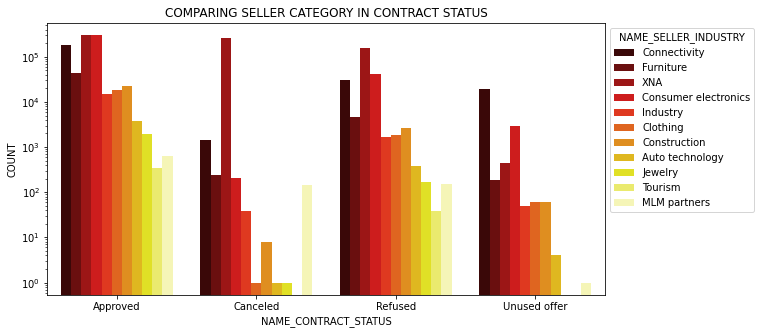

In [86]:
# DESCRIBING SELLER INDUSTRY IN CONTRACT STATUS
fig, axes = plt.subplots()
fig.set_size_inches(10,5)
b_e=sns.countplot(x='NAME_CONTRACT_STATUS', hue='NAME_SELLER_INDUSTRY', data=df_merge, palette='hot',
                         order = df_merge['NAME_CONTRACT_STATUS'].value_counts().index)
b_e.legend(bbox_to_anchor=(1, 1), loc='upper left',title = 'NAME_SELLER_INDUSTRY')
plt.title('COMPARING SELLER CATEGORY IN CONTRACT STATUS')
plt.ylabel('COUNT')
plt.yscale('log')

In [87]:
# STATISTICAL ANALYSIS
print(df_prev_app.groupby(['NAME_CONTRACT_STATUS']).NAME_SELLER_INDUSTRY.value_counts(normalize=True).mul(100))
df_prev_app.groupby(['NAME_SELLER_INDUSTRY']).NAME_CONTRACT_STATUS.value_counts(normalize=True).mul(100)

NAME_CONTRACT_STATUS  NAME_SELLER_INDUSTRY
Approved              XNA                     33.754670
                      Consumer electronics    33.294785
                      Connectivity            20.861108
                      Furniture                4.987167
                      Construction             2.567370
                      Clothing                 2.084432
                      Industry                 1.656763
                      Auto technology          0.435483
                      Jewelry                  0.237755
                      MLM partners             0.076873
                      Tourism                  0.043596
Canceled              XNA                     99.222936
                      Connectivity             0.521625
                      Furniture                0.090415
                      Consumer electronics     0.078402
                      MLM partners             0.066073
                      Industry                 0.015807
     

NAME_SELLER_INDUSTRY  NAME_CONTRACT_STATUS
Auto technology       Approved                90.480962
                      Refused                  9.378758
                      Unused offer             0.100200
                      Canceled                 0.040080
Clothing              Approved                90.237588
                      Refused                  9.457597
                      Unused offer             0.300639
                      Canceled                 0.004176
Connectivity          Approved                78.355535
                      Refused                 13.006604
                      Unused offer             8.040097
                      Canceled                 0.597763
Construction          Approved                89.379134
                      Refused                 10.328733
                      Unused offer             0.255196
                      Canceled                 0.036936
Consumer electronics  Approved                86.674450
     

In [88]:
# STATISTICAL ANALYSIS
df_merge.groupby(['NAME_SELLER_INDUSTRY']).TARGET.value_counts(normalize=True).mul(100)

NAME_SELLER_INDUSTRY  TARGET
Auto technology       0         89.632353
                      1         10.367647
Clothing              0         94.275231
                      1          5.724769
Connectivity          0         90.792952
                      1          9.207048
Construction          0         93.425660
                      1          6.574340
Consumer electronics  0         92.446613
                      1          7.553387
Furniture             0         93.883511
                      1          6.116489
Industry              0         92.786865
                      1          7.213135
Jewelry               0         91.124822
                      1          8.875178
MLM partners          0         93.811075
                      1          6.188925
Tourism               0         95.721925
                      1          4.278075
XNA                   0         90.644493
                      1          9.355507
Name: TARGET, dtype: float64

<div style="color:black;
           display:fill;
           border-radius:0.5px;
           background-color:papayawhip;
           font-size:20px;
           font-weight:600;
           font-family:Garamond;
           letter-spacing:0.05px">

<p style="padding:px;
              color:black;">
<h4>INSIGHTS:</h4> 
<ul>
<li>Seller industry type XNA were only 40.90% approved and 36.68% were cancelled. Most unused offers belonged to connectivity. MLM partners were only 65.60% approved.</li><br>   
</ul> 

</p>
</div>

# CASH LOAN PURPOSE ANALYSIS

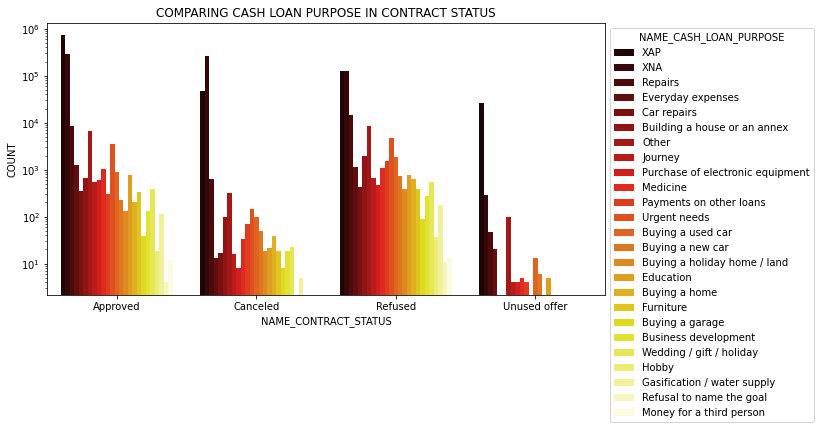

In [89]:
# DESCRIBING CASH LOAN PURPOSE IN CONTRACT STATUS
fig, axes = plt.subplots()
fig.set_size_inches(10,5)
b_e=sns.countplot(x='NAME_CONTRACT_STATUS', hue='NAME_CASH_LOAN_PURPOSE', data=df_prev_app, palette='hot',
                         order = df_prev_app['NAME_CONTRACT_STATUS'].value_counts().index)
b_e.legend(bbox_to_anchor=(1, 1), loc='upper left',title = 'NAME_CASH_LOAN_PURPOSE')
plt.title('COMPARING CASH LOAN PURPOSE IN CONTRACT STATUS')
plt.ylabel('COUNT')
plt.yscale('log')


In [90]:
# STATISTICAL ANALYSIS
print(df_prev_app.groupby(['NAME_CONTRACT_STATUS']).NAME_CASH_LOAN_PURPOSE.value_counts(normalize=True).mul(100))
df_prev_app.groupby(['NAME_CASH_LOAN_PURPOSE']).NAME_CONTRACT_STATUS.value_counts(normalize=True).mul(100)

NAME_CONTRACT_STATUS  NAME_CASH_LOAN_PURPOSE          
Approved              XAP                                 69.854772
                      XNA                                 27.547476
                      Repairs                              0.836917
                      Other                                0.644013
                      Urgent needs                         0.344721
                      Everyday expenses                    0.119215
                      Medicine                             0.100021
                      Buying a used car                    0.084975
                      Education                            0.073786
                      Building a house or an annex         0.065105
                      Purchase of electronic equipment     0.056714
                      Journey                              0.053917
                      Wedding / gift / holiday             0.038292
                      Car repairs                          0.

NAME_CASH_LOAN_PURPOSE            NAME_CONTRACT_STATUS
Building a house or an annex      Refused                 71.295952
                                  Approved                25.064983
                                  Canceled                 3.639064
Business development              Refused                 65.023474
                                  Approved                30.516432
                                  Canceled                 4.460094
Buying a garage                   Refused                 65.441176
                                  Approved                28.676471
                                  Canceled                 5.882353
Buying a holiday home / land      Refused                 71.669794
                                  Approved                24.765478
                                  Canceled                 3.564728
Buying a home                     Refused                 72.369942
                                  Approved                23.

In [91]:
# STATISTICAL ANALYSIS
df_merge.groupby(['NAME_CASH_LOAN_PURPOSE']).TARGET.value_counts(normalize=True).mul(100)

NAME_CASH_LOAN_PURPOSE            TARGET
Building a house or an annex      0         86.177474
                                  1         13.822526
Business development              0         87.186630
                                  1         12.813370
Buying a garage                   0         93.965517
                                  1          6.034483
Buying a holiday home / land      0         88.120950
                                  1         11.879050
Buying a home                     0         88.017118
                                  1         11.982882
Buying a new car                  0         90.970655
                                  1          9.029345
Buying a used car                 0         87.120292
                                  1         12.879708
Car repairs                       0         81.620839
                                  1         18.379161
Education                         0         89.505247
                                  1      

<div style="color:black;
           display:fill;
           border-radius:0.5px;
           background-color:papayawhip;
           font-size:20px;
           font-weight:600;
           font-family:Garamond;
           letter-spacing:0.05px">

<p style="padding:px;
              color:black;">
<h4>INSIGHTS:</h4> 
<ul>
<li>In cash loan purpose 78.5% of XAP and 42.13% of XNA was approved whereas 80.42% of Payment on other loans and 73.33% of Refusal to name the goal  were refused .</li><br>   
</ul> 
</p>
</div>

<div style="color:black;
           display:fill;
           border-radius:0.5px;
           background-color:lightsteelblue;
           font-size:20px;
           font-weight:600;
           font-family:Garamond;
           letter-spacing:0.05px">

<p style="padding:px;
              color:black;">
    

<h1>CONCLUDING THOUGHTS</h1>
<ul>    
<li>Overall there were more female clients.</li><br> 
<li>The IT staff, Private service staff, Realty agents and secretaries with lower secondary education, can be trusted.Students, business man never defaulted.</li><br>
<li>Banks should pay attention to:<br>
    <ul>
      <li>The age group of 25-40.<br> 
    <li>People with high credit amount for low goods price and low income.<br>
    <li>Female defaulters who were associated with high credit amount.<br>
    <li>People with occupation type as Laborers, Low skill laborers.<br>
    <li>People who belong to Business type entity 3, XNA, self employed.<br>
    <li>Realty agents with suite type group of people.<br>
    <li>Maternity income type with cash loans.<br>
    <li>People with Academic degree who took higher credits and with occupation type accountants and sales.</li><br>
        </ul>
<li>From Previous application:<br>
    <ul>
    <li>XNA contract type, XNA payment type defaulted more.<br>
    <li>Lower default rates in product combination as POS industry without interest, seller industry as clothing and tourism,           portfolio as cars.<br>
    <li>Higher default rates were found in Refusal to name the goal, Hobby, Car repairs, Gasification/water supply, Money for a third person and Payments on other loans in that order.<br>
        </ul>
</ul>    
</p>
</div>